# Exploratory data analysis (EDA) - Airbnb NYC - Pricing and Revenue

Note that 

 - this is not formated and contains my thinking process + many questions, so it's not the final version
 - after I receive feedback and better understand this, I'll make the final version
 - my statistics knowledge is rusty, so I struggled with the interpretation if the graphs and which features to analyse

## Data Cleaning

In this section I tried to understand each column to see which ones would make the final cut

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import folium
import numpy as np

In [2]:
listings_nyc = pd.read_csv('data/airbnb_nyc.csv')

listings_nyc.head()

id                                               name  \
0  2539                 Clean & quiet apt home by the park   
1  3647                THE VILLAGE OF HARLEM....NEW YORK !   
2  7750                  Huge 2 BR Upper East  Cental Park   
3  8505                 Sunny Bedroom Across Prospect Park   
4  8700  Magnifique Suite au N de Manhattan - vue Cloitres   

                                             summary  \
0           Renovated apt home in elevator building.   
1                                                NaN   
2                                                NaN   
3  Just renovated sun drenched bedroom in a quiet...   
4  Suite de 20 m2 a 5 min des 2 lignes de metro a...   

                                         description experiences_offered  \
0  Renovated apt home in elevator building. Spaci...                none   
1  WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...                none   
2  Large Furnished 2BR one block  to Central Park...                none   
3  Just renovated sun drenched bedroom in a quiet...                none   
4  Suite de 20 m2 a 5 min des 2 lignes de metro a...                none   

                               neighborhood_overview  \
0    Close to Prospect Park and Historic Ditmas Park   
1                                                NaN   
2                                                NaN   
3  Quiet and beautiful Windsor Terrace. The apart...   
4                                                NaN   

                                             transit  \
0  Very close to F and G trains and Express bus i...   
1                                                NaN   
2                                                NaN   
3  Ten minutes walk to the 15th sheet F&G train s...   
4                                       Metro 1 et A   

                                         house_rules  host_id  host_since  \
0  -The security and comfort of all our guests is...     2787     39698.0   
1  Upon arrival please have a legibile copy of yo...     4632     39777.0   
2                                                NaN    17985     39953.0   
3  - No shoes in the house - Quiet hours after 11...    25326     40006.0   
4                                                NaN    26394     40014.0   

   ... hot_tub_sauna_or_pool  internet  long_term_stays  pets_allowed  \
0  ...                    -1         1                1            -1   
1  ...                    -1         1               -1            -1   
2  ...                    -1         1               -1             1   
3  ...                    -1         1               -1            -1   
4  ...                    -1         1               -1            -1   

   private_entrance secure self_check_in  smoking_allowed  accessible  \
0                -1      1             1               -1           1   
1                -1     -1            -1               -1          -1   
2                -1     -1            -1               -1          -1   
3                -1     -1            -1               -1          -1   
4                -1     -1            -1               -1          -1   

  event_suitable  
0              1  
1             -1  
2             -1  
3             -1  
4             -1  

[5 rows x 81 columns]

In [3]:
listings_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 81 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   name                                          30166 non-null  object 
 2   summary                                       28961 non-null  object 
 3   description                                   29575 non-null  object 
 4   experiences_offered                           30179 non-null  object 
 5   neighborhood_overview                         18113 non-null  object 
 6   transit                                       18190 non-null  object 
 7   house_rules                                   16623 non-null  object 
 8   host_id                                       30179 non-null  int64  
 9   host_since                                    30170 non-null 

### Dropping columns that are not relevant for this quantitative analysis

Checked visualy and using listings_nyc.column_name.unique()

In [4]:
listings_nyc = listings_nyc.drop(['summary', 'description', 'experiences_offered', 'neighborhood_overview', 'transit', 'house_rules', 'amenities', 'host_since', 'host_identity_verified', 'name'], axis=1)

listings_nyc.head()

id  host_id host_response_time  host_response_rate  host_is_superhost  \
0  2539     2787     within an hour                 1.0                0.0   
1  3647     4632       within a day                 1.0                0.0   
2  7750    17985       within a day                 1.0                0.0   
3  8505    25326     within an hour                 1.0                1.0   
4  8700    26394                NaN                 NaN                0.0   

   host_listings_count                        street neighbourhood  latitude  \
0                  6.0  Brooklyn , NY, United States      Brooklyn  40.64749   
1                  1.0   New York, NY, United States        Harlem  40.80902   
2                  2.0   New York, NY, United States        Harlem  40.79685   
3                  2.0   Brooklyn, NY, United States      Brooklyn  40.65599   
4                  1.0   New York, NY, United States     Manhattan  40.86754   

   longitude  ... hot_tub_sauna_or_pool internet  long_term_stays  \
0  -73.97237  ...                    -1        1                1   
1  -73.94190  ...                    -1        1               -1   
2  -73.94872  ...                    -1        1               -1   
3  -73.97519  ...                    -1        1               -1   
4  -73.92639  ...                    -1        1               -1   

   pets_allowed  private_entrance  secure self_check_in  smoking_allowed  \
0            -1                -1       1             1               -1   
1            -1                -1      -1            -1               -1   
2             1                -1      -1            -1               -1   
3            -1                -1      -1            -1               -1   
4            -1                -1      -1            -1               -1   

   accessible  event_suitable  
0           1               1  
1          -1              -1  
2          -1              -1  
3          -1              -1  
4          -1              -1  

[5 rows x 71 columns]

In [5]:
listings_nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30179 entries, 0 to 30178
Data columns (total 71 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            30179 non-null  int64  
 1   host_id                                       30179 non-null  int64  
 2   host_response_time                            17082 non-null  object 
 3   host_response_rate                            17082 non-null  float64
 4   host_is_superhost                             30170 non-null  float64
 5   host_listings_count                           30170 non-null  float64
 6   street                                        30179 non-null  object 
 7   neighbourhood                                 30170 non-null  object 
 8   latitude                                      30179 non-null  float64
 9   longitude                                     30179 non-null 

### Checking for duplicates and nans in specific columns

In [6]:
listings_nyc['id'].duplicated().sum()

0

In [7]:
listings_nyc['host_id'].isnull().values.any()

False

### Grouping amenities

Decided to group the amenities as they are too many to analyse individually(and based on the other exercises I couldn't see any important relation between the individual amenities and pricing, etc)

first replacing -1 for 0

In [8]:
listings_nyc = listings_nyc.replace(-1, 0)

listings_nyc.head()

id  host_id host_response_time  host_response_rate  host_is_superhost  \
0  2539     2787     within an hour                 1.0                0.0   
1  3647     4632       within a day                 1.0                0.0   
2  7750    17985       within a day                 1.0                0.0   
3  8505    25326     within an hour                 1.0                1.0   
4  8700    26394                NaN                 NaN                0.0   

   host_listings_count                        street neighbourhood  latitude  \
0                  6.0  Brooklyn , NY, United States      Brooklyn  40.64749   
1                  1.0   New York, NY, United States        Harlem  40.80902   
2                  2.0   New York, NY, United States        Harlem  40.79685   
3                  2.0   Brooklyn, NY, United States      Brooklyn  40.65599   
4                  1.0   New York, NY, United States     Manhattan  40.86754   

   longitude  ... hot_tub_sauna_or_pool internet  long_term_stays  \
0  -73.97237  ...                     0        1                1   
1  -73.94190  ...                     0        1                0   
2  -73.94872  ...                     0        1                0   
3  -73.97519  ...                     0        1                0   
4  -73.92639  ...                     0        1                0   

   pets_allowed  private_entrance  secure self_check_in  smoking_allowed  \
0             0                 0       1             1                0   
1             0                 0       0             0                0   
2             1                 0       0             0                0   
3             0                 0       0             0                0   
4             0                 0       0             0                0   

   accessible  event_suitable  
0           1               1  
1           0               0  
2           0               0  
3           0               0  
4           0               0  

[5 rows x 71 columns]

 - Creating external amenities group with: 'bbq', 'balcony', 'nature_and_views', 'outdoor_space', 'hot_tub_sauna_or_pool'

In [9]:
listings_nyc['external_amenities'] = listings_nyc['bbq'] + listings_nyc['balcony'] + listings_nyc['nature_and_views'] + listings_nyc['outdoor_space'] + listings_nyc ['hot_tub_sauna_or_pool']

listings_nyc = listings_nyc.drop(['bbq', 'balcony', 'nature_and_views', 'outdoor_space', 'hot_tub_sauna_or_pool'], axis=1)

listings_nyc.head()

id  host_id host_response_time  host_response_rate  host_is_superhost  \
0  2539     2787     within an hour                 1.0                0.0   
1  3647     4632       within a day                 1.0                0.0   
2  7750    17985       within a day                 1.0                0.0   
3  8505    25326     within an hour                 1.0                1.0   
4  8700    26394                NaN                 NaN                0.0   

   host_listings_count                        street neighbourhood  latitude  \
0                  6.0  Brooklyn , NY, United States      Brooklyn  40.64749   
1                  1.0   New York, NY, United States        Harlem  40.80902   
2                  2.0   New York, NY, United States        Harlem  40.79685   
3                  2.0   Brooklyn, NY, United States      Brooklyn  40.65599   
4                  1.0   New York, NY, United States     Manhattan  40.86754   

   longitude  ... internet long_term_stays  pets_allowed  private_entrance  \
0  -73.97237  ...        1               1             0                 0   
1  -73.94190  ...        1               0             0                 0   
2  -73.94872  ...        1               0             1                 0   
3  -73.97519  ...        1               0             0                 0   
4  -73.92639  ...        1               0             0                 0   

   secure  self_check_in smoking_allowed  accessible  event_suitable  \
0       1              1               0           1               1   
1       0              0               0           0               0   
2       0              0               0           0               0   
3       0              0               0           0               0   
4       0              0               0           0               0   

   external_amenities  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 67 columns]

In [10]:
listings_nyc['external_amenities']

0        0
1        0
2        0
3        0
4        0
        ..
30174    0
30175    0
30176    0
30177    0
30178    0
Name: external_amenities, Length: 30179, dtype: int64

 - Creating 'building_offers' group with: 'elevator', 'gym', 'parking', 'private_entrance', 'self_check_in', 'secure', 'smoking_allowed', 'accessible', 'event_suitable', 'pets_allowed', 'child_friendly'

In [11]:
listings_nyc['building_offers'] = listings_nyc['elevator'] + listings_nyc['gym'] + listings_nyc['parking'] + listings_nyc['private_entrance'] + listings_nyc ['self_check_in'] +listings_nyc['secure'] + listings_nyc['smoking_allowed'] + listings_nyc['accessible'] + listings_nyc['event_suitable'] + listings_nyc ['pets_allowed'] + listings_nyc ['child_friendly']

listings_nyc = listings_nyc.drop(['elevator', 'gym', 'parking', 'private_entrance', 'self_check_in', 'secure', 'smoking_allowed', 'accessible', 'event_suitable', 'pets_allowed', 'child_friendly'], axis=1)

listings_nyc.head()

id  host_id host_response_time  host_response_rate  host_is_superhost  \
0  2539     2787     within an hour                 1.0                0.0   
1  3647     4632       within a day                 1.0                0.0   
2  7750    17985       within a day                 1.0                0.0   
3  8505    25326     within an hour                 1.0                1.0   
4  8700    26394                NaN                 NaN                0.0   

   host_listings_count                        street neighbourhood  latitude  \
0                  6.0  Brooklyn , NY, United States      Brooklyn  40.64749   
1                  1.0   New York, NY, United States        Harlem  40.80902   
2                  2.0   New York, NY, United States        Harlem  40.79685   
3                  2.0   Brooklyn, NY, United States      Brooklyn  40.65599   
4                  1.0   New York, NY, United States     Manhattan  40.86754   

   longitude  ... breakfast tv  coffee_machine  cooking_basics  white_goods  \
0  -73.97237  ...         0  1               1               1            1   
1  -73.94190  ...         0  1               0               0            0   
2  -73.94872  ...         0  1               0               0            0   
3  -73.97519  ...         0  0               0               0            1   
4  -73.92639  ...         0  0               0               0            1   

   host_greeting internet  long_term_stays  external_amenities  \
0              0        1                1                   0   
1              0        1                0                   0   
2              0        1                0                   0   
3              1        1                0                   0   
4              1        1                0                   0   

   building_offers  
0                6  
1                0  
2                2  
3                1  
4                3  

[5 rows x 57 columns]

- Creating 'internal_amenities' group with: 'air_conditioning', 'bed_linen', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'internet', 'high_end_electronics'

In [12]:
listings_nyc['internal_amenities'] = listings_nyc['air_conditioning'] + listings_nyc['bed_linen'] + listings_nyc['tv'] + listings_nyc['coffee_machine'] + listings_nyc['cooking_basics'] + listings_nyc['white_goods'] + listings_nyc['internet'] + listings_nyc['high_end_electronics']

listings_nyc = listings_nyc.drop(['air_conditioning', 'bed_linen', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'internet', 'high_end_electronics'], axis=1)

listings_nyc.head()

id  host_id host_response_time  host_response_rate  host_is_superhost  \
0  2539     2787     within an hour                 1.0                0.0   
1  3647     4632       within a day                 1.0                0.0   
2  7750    17985       within a day                 1.0                0.0   
3  8505    25326     within an hour                 1.0                1.0   
4  8700    26394                NaN                 NaN                0.0   

   host_listings_count                        street neighbourhood  latitude  \
0                  6.0  Brooklyn , NY, United States      Brooklyn  40.64749   
1                  1.0   New York, NY, United States        Harlem  40.80902   
2                  2.0   New York, NY, United States        Harlem  40.79685   
3                  2.0   Brooklyn, NY, United States      Brooklyn  40.65599   
4                  1.0   New York, NY, United States     Manhattan  40.86754   

   longitude  ... calculated_host_listings_count_private_rooms  \
0  -73.97237  ...                                            5   
1  -73.94190  ...                                            1   
2  -73.94872  ...                                            1   
3  -73.97519  ...                                            1   
4  -73.92639  ...                                            1   

  calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                           1               0.21   
1                                           0                NaN   
2                                           0                NaN   
3                                           0               1.37   
4                                           0                NaN   

   check_in_24h  breakfast  host_greeting long_term_stays  external_amenities  \
0             1          0              0               1                   0   
1             0          0              0               0                   0   
2             0          0              0               0                   0   
3             0          0              1               0                   0   
4             0          0              1               0                   0   

   building_offers  internal_amenities  
0                6                   6  
1                0                   3  
2                2                   3  
3                1                   4  
4                3                   2  

[5 rows x 50 columns]

- Creating 'extras' group with: 'breakfast', 'host_greeting', 'long_term_stays', 'check_in_24h'

In [13]:
listings_nyc['extras'] = listings_nyc['breakfast'] + listings_nyc['host_greeting'] + listings_nyc['long_term_stays'] + listings_nyc['check_in_24h']

listings_nyc = listings_nyc.drop(['breakfast', 'host_greeting', 'long_term_stays', 'check_in_24h'], axis=1)

listings_nyc.head()

id  host_id host_response_time  host_response_rate  host_is_superhost  \
0  2539     2787     within an hour                 1.0                0.0   
1  3647     4632       within a day                 1.0                0.0   
2  7750    17985       within a day                 1.0                0.0   
3  8505    25326     within an hour                 1.0                1.0   
4  8700    26394                NaN                 NaN                0.0   

   host_listings_count                        street neighbourhood  latitude  \
0                  6.0  Brooklyn , NY, United States      Brooklyn  40.64749   
1                  1.0   New York, NY, United States        Harlem  40.80902   
2                  2.0   New York, NY, United States        Harlem  40.79685   
3                  2.0   Brooklyn, NY, United States      Brooklyn  40.65599   
4                  1.0   New York, NY, United States     Manhattan  40.86754   

   longitude  ...          cancellation_policy calculated_host_listings_count  \
0  -73.97237  ...                     moderate                              6   
1  -73.94190  ...  strict_14_with_grace_period                              1   
2  -73.94872  ...                     flexible                              2   
3  -73.97519  ...                     moderate                              2   
4  -73.92639  ...                     moderate                              1   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            0   
2                                            1   
3                                            1   
4                                            0   

   calculated_host_listings_count_private_rooms  \
0                                             5   
1                                             1   
2                                             1   
3                                             1   
4                                             1   

   calculated_host_listings_count_shared_rooms  reviews_per_month  \
0                                            1               0.21   
1                                            0                NaN   
2                                            0                NaN   
3                                            0               1.37   
4                                            0                NaN   

  external_amenities  building_offers  internal_amenities  extras  
0                  0                6                   6       2  
1                  0                0                   3       0  
2                  0                2                   3       0  
3                  0                1                   4       1  
4                  0                3                   2       1  

[5 rows x 47 columns]

### Cleaning some more

In [14]:
listings_nyc.street.unique()

array(['Brooklyn , NY, United States', 'New York, NY, United States',
       'Brooklyn, NY, United States', 'Queens, NY, United States',
       'Astoria, NY, United States', 'Bronx, NY, United States',
       'Rockaway Beach, NY, United States',
       'Staten Island, NY, United States', 'Jamaica, NY, United States',
       'Briarwood, NY, United States', 'Kips Bay, NY, United States',
       'Flushing, NY, United States',
       'Long Island City, NY, United States',
       'Astoria , NY, United States', 'Kew Gardens, NY, United States',
       'Brooklyn, Bedford Stuyvesant, NY, United States',
       'Sunnyside, NY, United States', 'ASTORIA, NY, United States',
       'Woodside, NY, United States',
       'Bushwick, Brooklyn, NY, United States', 'NY, NY, United States',
       'Sunnyside , NY, United States',
       'Jackson Heights, NY, United States',
       'Rockaway beach, NY, United States',
       'Whitestone, NY, United States',
       'Park Slope, Brooklyn, NY, United States'

 - found some CA listings, will delete them

In [15]:
listings_nyc = listings_nyc[(listings_nyc.street != 'Sunnyvale, CA, United States') & (listings_nyc.street != 'Pomona, CA, United States')]

listings_nyc.street.unique()

array(['Brooklyn , NY, United States', 'New York, NY, United States',
       'Brooklyn, NY, United States', 'Queens, NY, United States',
       'Astoria, NY, United States', 'Bronx, NY, United States',
       'Rockaway Beach, NY, United States',
       'Staten Island, NY, United States', 'Jamaica, NY, United States',
       'Briarwood, NY, United States', 'Kips Bay, NY, United States',
       'Flushing, NY, United States',
       'Long Island City, NY, United States',
       'Astoria , NY, United States', 'Kew Gardens, NY, United States',
       'Brooklyn, Bedford Stuyvesant, NY, United States',
       'Sunnyside, NY, United States', 'ASTORIA, NY, United States',
       'Woodside, NY, United States',
       'Bushwick, Brooklyn, NY, United States', 'NY, NY, United States',
       'Sunnyside , NY, United States',
       'Jackson Heights, NY, United States',
       'Rockaway beach, NY, United States',
       'Whitestone, NY, United States',
       'Park Slope, Brooklyn, NY, United States'

 - Values on street column are messy and not accurate/useful, deleting it with other columns that won't be relevant

In [16]:
listings_nyc = listings_nyc.drop(['street', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1)

listings_nyc.head()

id  host_id host_response_time  host_response_rate  host_is_superhost  \
0  2539     2787     within an hour                 1.0                0.0   
1  3647     4632       within a day                 1.0                0.0   
2  7750    17985       within a day                 1.0                0.0   
3  8505    25326     within an hour                 1.0                1.0   
4  8700    26394                NaN                 NaN                0.0   

   host_listings_count neighbourhood  latitude  longitude property_type  ...  \
0                  6.0      Brooklyn  40.64749  -73.97237     Apartment  ...   
1                  1.0        Harlem  40.80902  -73.94190     Apartment  ...   
2                  2.0        Harlem  40.79685  -73.94872     Apartment  ...   
3                  2.0      Brooklyn  40.65599  -73.97519   Condominium  ...   
4                  1.0     Manhattan  40.86754  -73.92639     Apartment  ...   

  review_scores_location  review_scores_value  instant_bookable  \
0                   10.0                 10.0                 0   
1                    NaN                  NaN                 0   
2                    NaN                  NaN                 0   
3                   10.0                  9.0                 0   
4                    NaN                  NaN                 0   

           cancellation_policy  calculated_host_listings_count  \
0                     moderate                               6   
1  strict_14_with_grace_period                               1   
2                     flexible                               2   
3                     moderate                               2   
4                     moderate                               1   

  reviews_per_month  external_amenities  building_offers  internal_amenities  \
0              0.21                   0                6                   6   
1               NaN                   0                0                   3   
2               NaN                   0                2                   3   
3              1.37                   0                1                   4   
4               NaN                   0                3                   2   

   extras  
0       2  
1       0  
2       0  
3       1  
4       1  

[5 rows x 43 columns]

In [17]:
listings_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30177 entries, 0 to 30178
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30177 non-null  int64  
 1   host_id                         30177 non-null  int64  
 2   host_response_time              17081 non-null  object 
 3   host_response_rate              17081 non-null  float64
 4   host_is_superhost               30168 non-null  float64
 5   host_listings_count             30168 non-null  float64
 6   neighbourhood                   30168 non-null  object 
 7   latitude                        30177 non-null  float64
 8   longitude                       30177 non-null  float64
 9   property_type                   30177 non-null  object 
 10  room_type                       30177 non-null  object 
 11  accommodates                    30177 non-null  int64  
 12  bathrooms                       

 - deleting more columns: availability is always the same and 'calendar updated' is not relevant

In [18]:
listings_nyc.has_availability.unique()

array([1], dtype=int64)

In [19]:
listings_nyc = listings_nyc.drop(['calendar_updated', 'has_availability'], axis =1)

listings_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30177 entries, 0 to 30178
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30177 non-null  int64  
 1   host_id                         30177 non-null  int64  
 2   host_response_time              17081 non-null  object 
 3   host_response_rate              17081 non-null  float64
 4   host_is_superhost               30168 non-null  float64
 5   host_listings_count             30168 non-null  float64
 6   neighbourhood                   30168 non-null  object 
 7   latitude                        30177 non-null  float64
 8   longitude                       30177 non-null  float64
 9   property_type                   30177 non-null  object 
 10  room_type                       30177 non-null  object 
 11  accommodates                    30177 non-null  int64  
 12  bathrooms                       

- removing availability_60,90 and 365 too

In [20]:
listings_nyc = listings_nyc.drop(['availability_60', 'availability_90', 'availability_365' ] , axis =1)

listings_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30177 entries, 0 to 30178
Data columns (total 38 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30177 non-null  int64  
 1   host_id                         30177 non-null  int64  
 2   host_response_time              17081 non-null  object 
 3   host_response_rate              17081 non-null  float64
 4   host_is_superhost               30168 non-null  float64
 5   host_listings_count             30168 non-null  float64
 6   neighbourhood                   30168 non-null  object 
 7   latitude                        30177 non-null  float64
 8   longitude                       30177 non-null  float64
 9   property_type                   30177 non-null  object 
 10  room_type                       30177 non-null  object 
 11  accommodates                    30177 non-null  int64  
 12  bathrooms                       

- trying to understand the difference between these two columns below, and after visual check and quick research, keeping only 'calculated_host_listings_count'

In [21]:
listings_nyc[['host_listings_count', 'calculated_host_listings_count']]


host_listings_count  calculated_host_listings_count
0                      6.0                               6
1                      1.0                               1
2                      2.0                               2
3                      2.0                               2
4                      1.0                               1
...                    ...                             ...
30174                  2.0                               2
30175                  1.0                               2
30176                  2.0                               2
30177                  7.0                               6
30178                  0.0                               1

[30177 rows x 2 columns]

In [22]:
listings_nyc = listings_nyc.drop(['host_listings_count'], axis=1)

listings_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30177 entries, 0 to 30178
Data columns (total 37 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30177 non-null  int64  
 1   host_id                         30177 non-null  int64  
 2   host_response_time              17081 non-null  object 
 3   host_response_rate              17081 non-null  float64
 4   host_is_superhost               30168 non-null  float64
 5   neighbourhood                   30168 non-null  object 
 6   latitude                        30177 non-null  float64
 7   longitude                       30177 non-null  float64
 8   property_type                   30177 non-null  object 
 9   room_type                       30177 non-null  object 
 10  accommodates                    30177 non-null  int64  
 11  bathrooms                       30177 non-null  float64
 12  bedrooms                        

### Checking for nan values

In [23]:
listings_nyc.isna().sum()

id                                    0
host_id                               0
host_response_time                13096
host_response_rate                13096
host_is_superhost                     9
neighbourhood                         9
latitude                              0
longitude                             0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                             0
bedrooms                              0
beds                                  0
bed_type                              0
price                                 0
guests_included                       0
extra_people                          0
minimum_nights                        0
availability_30                       0
number_of_reviews                     0
number_of_reviews_ltm                 0
review_scores_rating               9084
review_scores_accuracy             9110
review_scores_cleanliness          9100


 - too many NANs for the review related fields and also host response.
 - apart from that the review scores rating is way too high

Text(0, 0.5, 'review_scores_rating')

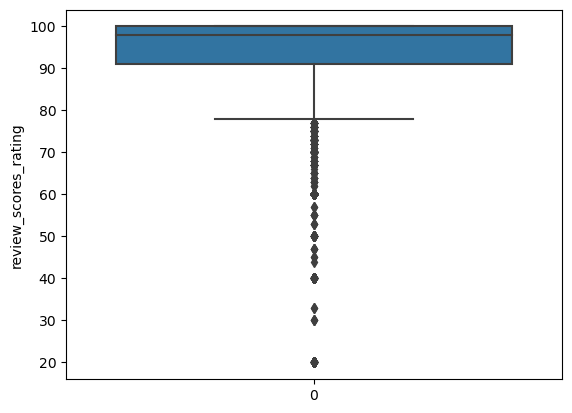

In [24]:
sns.boxplot(data=listings_nyc['review_scores_rating'])
plt.ylabel('review_scores_rating')

 - Deleting all those columns

In [25]:
listings_nyc = listings_nyc.drop(['host_response_time', 'host_response_rate', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'reviews_per_month', 'number_of_reviews', 'number_of_reviews_ltm'] , axis = 1)

listings_nyc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30177 entries, 0 to 30178
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30177 non-null  int64  
 1   host_id                         30177 non-null  int64  
 2   host_is_superhost               30168 non-null  float64
 3   neighbourhood                   30168 non-null  object 
 4   latitude                        30177 non-null  float64
 5   longitude                       30177 non-null  float64
 6   property_type                   30177 non-null  object 
 7   room_type                       30177 non-null  object 
 8   accommodates                    30177 non-null  int64  
 9   bathrooms                       30177 non-null  float64
 10  bedrooms                        30177 non-null  int64  
 11  beds                            30177 non-null  int64  
 12  bed_type                        

### Final cleaning

#### a) price

Below I tried to have an overview of the pricing and see if I was going to drop the outliers

But, I think it's important to keep them, so in the end I just deleted the listings pricing < 15

<Axes: xlabel='price', ylabel='Count'>

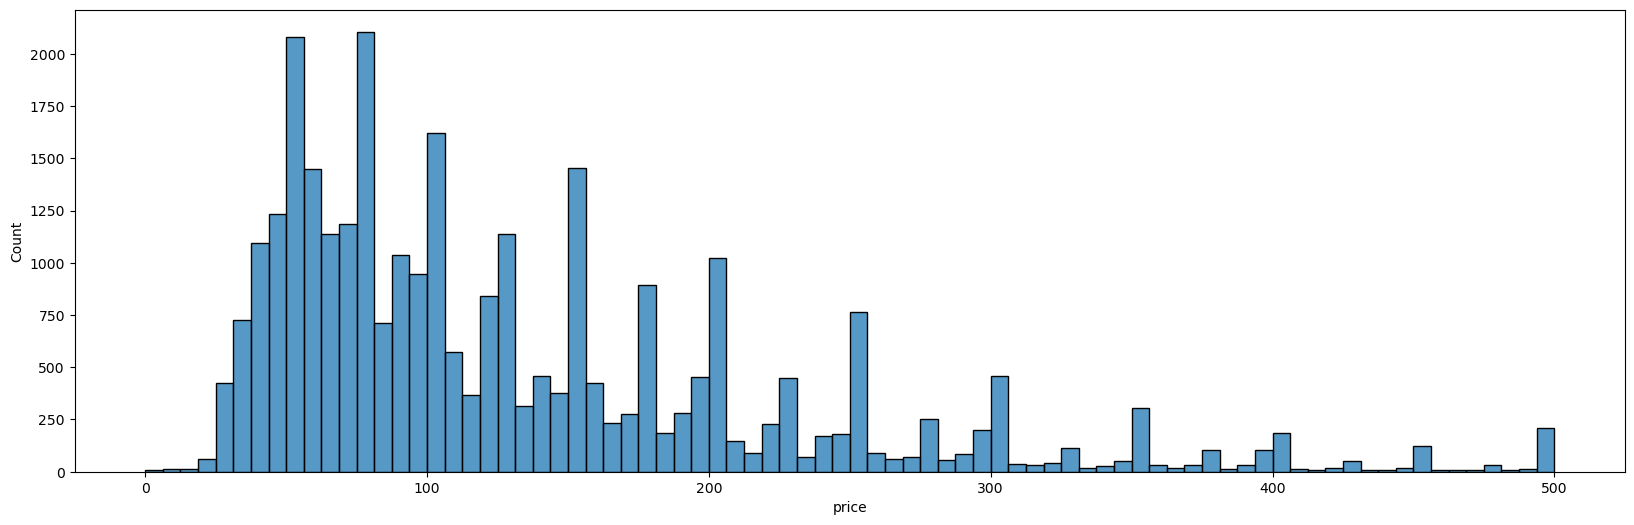

In [26]:
plt.figure(figsize=(20, 6))
sns.histplot(data=listings_nyc, x="price", bins =80)

In [27]:
listings_nyc["price"].value_counts()

100    1339
150    1292
50     1122
60      999
200     964
       ... 
423       1
362       1
373       1
434       1
338       1
Name: price, Length: 442, dtype: int64

Text(0, 0.5, 'price')

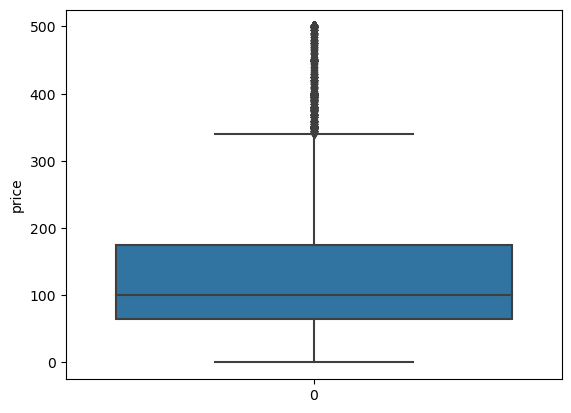

In [28]:
sns.boxplot(data=listings_nyc['price'])
plt.ylabel('price')

In [29]:
very_low_price = listings_nyc[listings_nyc['price'] <= 28]

very_low_price

id    host_id  host_is_superhost       neighbourhood  latitude  \
926     1620248    2196224                0.0           Manhattan  40.73051   
1392    2459916   12577771                0.0  Bedford-Stuyvesant  40.68948   
1798    3359315   16948705                0.0           Manhattan  40.81742   
2194    4031809   20902552                0.0           Manhattan  40.83456   
2227    4093591   11090576                0.0            Bushwick  40.69216   
...         ...        ...                ...                 ...       ...   
29815  36280646  272872092                0.0              Queens  40.73657   
29960  36354776  273393150                0.0    South Ozone Park  40.68639   
30126  36450814  267223765                0.0            Flatbush  40.64922   
30155  36473044  261338177                0.0           Gravesend  40.59080   
30156  36473253  261338177                0.0            Brooklyn  40.59118   

       longitude property_type        room_type  accommodates  bathrooms  ...  \
926    -73.98140     Apartment  Entire home/apt             3        1.0  ...   
1392   -73.93528         House     Private room             1        1.0  ...   
1798   -73.95358     Apartment     Private room             1        1.0  ...   
2194   -73.94344     Apartment     Private room             4        1.0  ...   
2227   -73.90859     Apartment     Private room             1        1.0  ...   
...          ...           ...              ...           ...        ...  ...   
29815  -73.85088     Apartment  Entire home/apt             2        1.0  ...   
29960  -73.81847         House     Private room             1        1.0  ...   
30126  -73.96078     Apartment      Shared room             1        1.0  ...   
30155  -73.97116     Apartment      Shared room             1        1.0  ...   
30156  -73.97119     Apartment      Shared room             1        1.0  ...   

       extra_people  minimum_nights availability_30  instant_bookable  \
926               0              30               0                 1   
1392              0               1               0                 0   
1798              0              10               0                 0   
2194              0              14               0                 1   
2227              0               1               0                 0   
...             ...             ...             ...               ...   
29815             0               9              11                 1   
29960             0               2               7                 0   
30126             0               1              28                 1   
30155             0               1               3                 0   
30156             0               7              30                 0   

               cancellation_policy  calculated_host_listings_count  \
926    strict_14_with_grace_period                               4   
1392   strict_14_with_grace_period                               1   
1798                      flexible                               1   
2194                      flexible                               1   
2227                      flexible                               1   
...                            ...                             ...   
29815                     flexible                               1   
29960                     flexible                               1   
30126                     moderate                               3   
30155                     flexible                               6   
30156                     flexible                               6   

       external_amenities  building_offers  internal_amenities extras  
926                     0                1                   3      2  
1392                    0                1                   1      0  
1798                    0                0                   2      0  
2194                    0                1                   4      0  
2227         

<Axes: xlabel='price', ylabel='Count'>

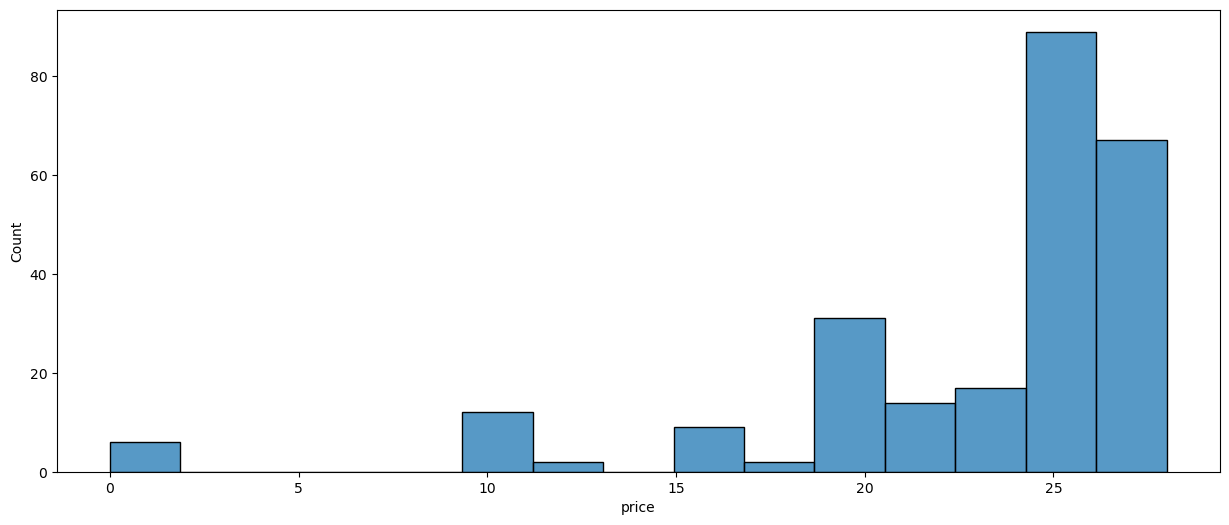

In [30]:
plt.figure(figsize=(15, 6))
sns.histplot(data=very_low_price, x="price")

In [31]:
listings_nyc_final = listings_nyc[listings_nyc.price > 15]

listings_nyc_final.head()

id  host_id  host_is_superhost neighbourhood  latitude  longitude  \
0  2539     2787                0.0      Brooklyn  40.64749  -73.97237   
1  3647     4632                0.0        Harlem  40.80902  -73.94190   
2  7750    17985                0.0        Harlem  40.79685  -73.94872   
3  8505    25326                1.0      Brooklyn  40.65599  -73.97519   
4  8700    26394                0.0     Manhattan  40.86754  -73.92639   

  property_type        room_type  accommodates  bathrooms  ...  extra_people  \
0     Apartment     Private room             2        1.0  ...            35   
1     Apartment     Private room             2        1.0  ...            20   
2     Apartment  Entire home/apt             4        1.0  ...             0   
3   Condominium     Private room             2        1.0  ...            20   
4     Apartment     Private room             2        1.0  ...            20   

   minimum_nights availability_30  instant_bookable  \
0               1              30                 0   
1               3              30                 0   
2               7               4                 0   
3               1              25                 0   
4               4               0                 0   

           cancellation_policy  calculated_host_listings_count  \
0                     moderate                               6   
1  strict_14_with_grace_period                               1   
2                     flexible                               2   
3                     moderate                               2   
4                     moderate                               1   

   external_amenities  building_offers  internal_amenities extras  
0                   0                6                   6      2  
1                   0                0                   3      0  
2                   0                2                   3      0  
3                   0                1                   4      1  
4                   0                3                   2      1  

[5 rows x 25 columns]

#### b) Property type

I also had spotted something weird in property type columns, so deleting the 'Cuba' ones

In [32]:
listings_nyc_final.property_type.value_counts()



Apartment                 24517
House                      2122
Condominium                 981
Townhouse                   770
Loft                        740
Serviced apartment          290
Hotel                       192
Guest suite                 137
Boutique hotel              104
Other                        65
Bed and breakfast            63
Hostel                       43
Resort                       25
Guesthouse                   24
Bungalow                     19
Aparthotel                   11
Villa                         9
Tiny house                    7
Cabin                         4
Earth house                   4
Casa particular (Cuba)        3
Tent                          3
Boat                          3
Cottage                       3
Farm stay                     2
Yurt                          2
Cave                          2
Houseboat                     2
Dome house                    1
Castle                        1
Camper/RV                     1
Treehous

In [33]:
listings_nyc_final = listings_nyc_final[listings_nyc_final.property_type != 'Casa particular (Cuba)']

listings_nyc_final

id    host_id  host_is_superhost       neighbourhood  latitude  \
0          2539       2787                0.0            Brooklyn  40.64749   
1          3647       4632                0.0              Harlem  40.80902   
2          7750      17985                0.0              Harlem  40.79685   
3          8505      25326                1.0            Brooklyn  40.65599   
4          8700      26394                0.0           Manhattan  40.86754   
...         ...        ...                ...                 ...       ...   
30174  36484363  107716952                0.0             Jamaica  40.69137   
30175  36484665    8232441                0.0  Bedford-Stuyvesant  40.67853   
30176  36485057    6570630                0.0            Brooklyn  40.70184   
30177  36485609   30985759                0.0      Hell's Kitchen  40.75751   
30178  36487245   68119814                0.0             Midtown  40.76404   

       longitude property_type        room_type  accommodates  bathrooms  ...  \
0      -73.97237     Apartment     Private room             2        1.0  ...   
1      -73.94190     Apartment     Private room             2        1.0  ...   
2      -73.94872     Apartment  Entire home/apt             4        1.0  ...   
3      -73.97519   Condominium     Private room             2        1.0  ...   
4      -73.92639     Apartment     Private room             2        1.0  ...   
...          ...           ...              ...           ...        ...  ...   
30174  -73.80844         House     Private room             6        2.0  ...   
30175  -73.94995     Townhouse     Private room             3        1.0  ...   
30176  -73.93317     Apartment     Private room             1        1.0  ...   
30177  -73.99112     Apartment      Shared room             1        1.0  ...   
30178  -73.98933     Apartment     Private room             2        2.0  ...   

       extra_people  minimum_nights availability_30  instant_bookable  \
0                35               1              30                 0   
1                20               3              30                 0   
2                 0               7               4                 0   
3                20               1              25                 0   
4                20               4               0                 0   
...             ...             ...             ...               ...   
30174             0               1              13                 0   
30175             0               2               8                 0   
30176             0               4              11                 0   
30177             0               1               2                 0   
30178             0               7               0                 0   

               cancellation_policy  calculated_host_listings_count  \
0                         moderate                               6   
1      strict_14_with_grace_period                               1   
2                         flexible                               2   
3                         moderate                               2   
4                         moderate                               1   
...                            ...                             ...   
30174                     flexible                               2   
30175                     flexible                               2   
30176                     flexible                               2   
30177                     flexible                               6   
30178  strict_14_with_grace_period                               1   

       external_amenities  building_offers  internal_amenities extras  
0                       0                6                   6      2  
1                       0                0                   3      0  
2                       0                2                   3      0  
3                       0                1                   4      1  
4            

### c) Creating column with revenue per listing per month

This is a snapshot on the revenue for each listing at the moment the data was extracted

I imagine this will change greatly depending on when the data is extracted, but hopefully it can show some trends and help the analysis

In [34]:
listings_nyc_final["revenue_month"] = (listings_nyc_final['price'] * (30 - listings_nyc_final['availability_30']))

listings_nyc_final.head()

id  host_id  host_is_superhost neighbourhood  latitude  longitude  \
0  2539     2787                0.0      Brooklyn  40.64749  -73.97237   
1  3647     4632                0.0        Harlem  40.80902  -73.94190   
2  7750    17985                0.0        Harlem  40.79685  -73.94872   
3  8505    25326                1.0      Brooklyn  40.65599  -73.97519   
4  8700    26394                0.0     Manhattan  40.86754  -73.92639   

  property_type        room_type  accommodates  bathrooms  ...  \
0     Apartment     Private room             2        1.0  ...   
1     Apartment     Private room             2        1.0  ...   
2     Apartment  Entire home/apt             4        1.0  ...   
3   Condominium     Private room             2        1.0  ...   
4     Apartment     Private room             2        1.0  ...   

   minimum_nights  availability_30 instant_bookable  \
0               1               30                0   
1               3               30                0   
2               7                4                0   
3               1               25                0   
4               4                0                0   

           cancellation_policy  calculated_host_listings_count  \
0                     moderate                               6   
1  strict_14_with_grace_period                               1   
2                     flexible                               2   
3                     moderate                               2   
4                     moderate                               1   

   external_amenities  building_offers  internal_amenities  extras  \
0                   0                6                   6       2   
1                   0                0                   3       0   
2                   0                2                   3       0   
3                   0                1                   4       1   
4                   0                3                   2       1   

  revenue_month  
0             0  
1             0  
2          4940  
3           300  
4          2400  

[5 rows x 26 columns]

## Actual analysis of pricing and monthly revenue

After cleaning I started analysing the data

Please let me know if the aspects analysed and graphs make sense

Note that I added a variation of graphs, just to test them all and see how they behave

 - Here the idea is just to have an overview of pricing and monthly revenue distributions

<Axes: xlabel='price', ylabel='Count'>

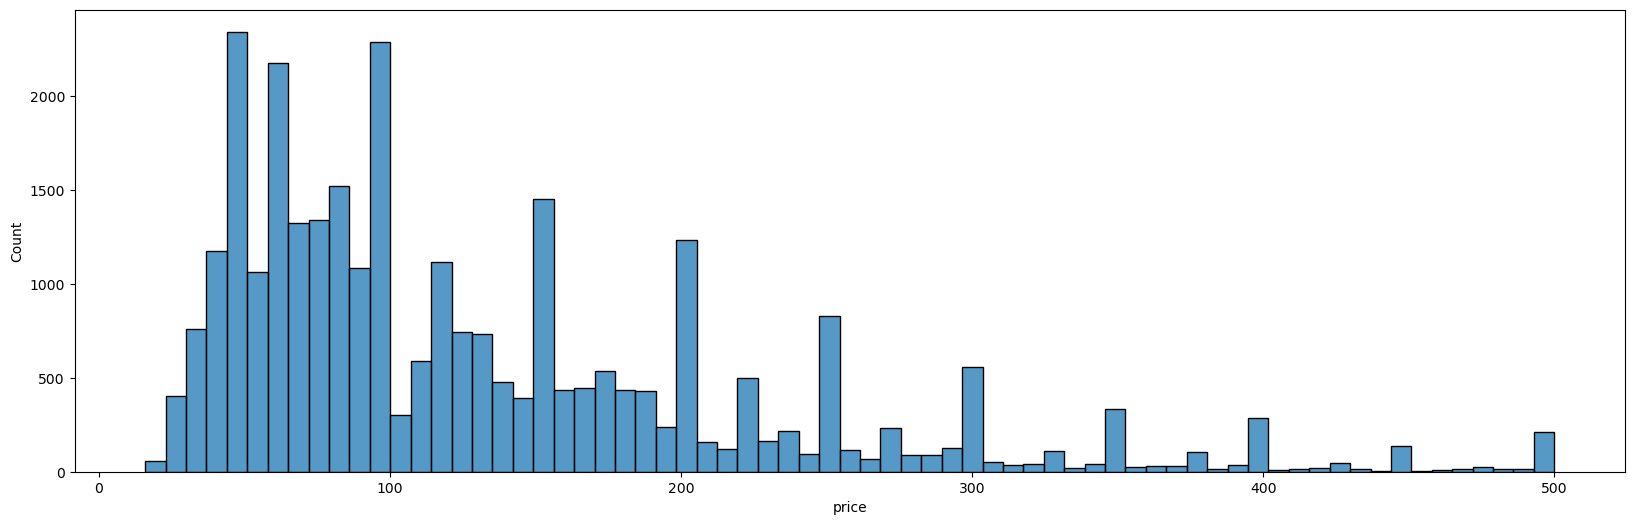

In [35]:
plt.figure(figsize=(20, 6))
sns.histplot(data=listings_nyc_final, x="price")

<Axes: xlabel='revenue_month', ylabel='Count'>

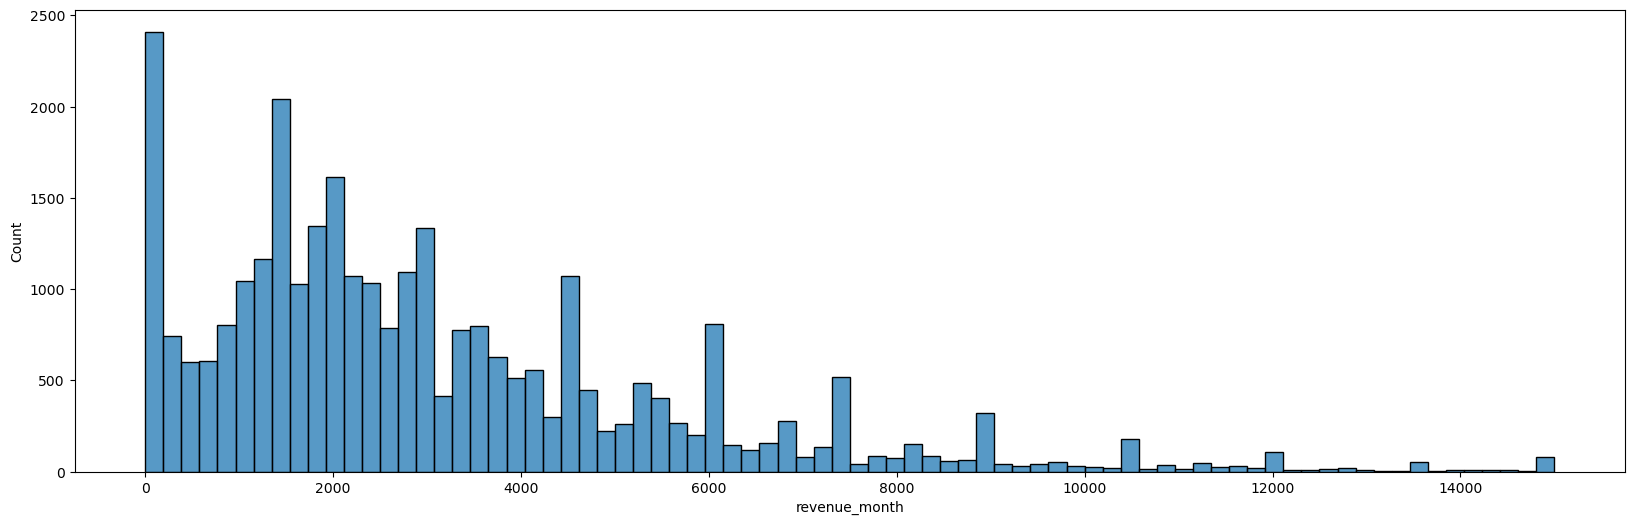

In [36]:
plt.figure(figsize=(20, 6))
sns.histplot(data=listings_nyc_final, x="revenue_month")

- Ran out of time to explain the below properly, hopefully it's clear(please remember this is a draft, final version after the review)

In [37]:
def price_group_percentage(val, operator, column):
    if operator == '<':
        res = listings_nyc_final[listings_nyc_final[column]<val].shape[0]
    elif operator == '>':
        res = listings_nyc_final[listings_nyc_final[column]>val].shape[0]
    elif operator == '=':
        res = listings_nyc_final[listings_nyc_final[column]==val].shape[0]
    print(f'{res} listings, {round(res*100/listings_nyc_final.shape[0], 2)}%')
    
    
price_group_percentage(100, '=', 'price')
price_group_percentage(150, '=', 'price')
price_group_percentage(50, '=', 'price')
price_group_percentage(50, '<', 'price')
price_group_percentage(200, '<', 'price')
price_group_percentage(200, '>', 'price')
price_group_percentage(300, '>', 'price')


1339 listings, 4.44%
1292 listings, 4.29%
1122 listings, 3.72%
3545 listings, 11.76%
24078 listings, 79.86%
5107 listings, 16.94%
1715 listings, 5.69%


In [38]:
price_group_percentage(3000, '=', 'revenue_month')
price_group_percentage(4500, '=', 'revenue_month')
price_group_percentage(1500, '=', 'revenue_month')
price_group_percentage(1500, '<', 'revenue_month')
price_group_percentage(6000, '<', 'revenue_month')
price_group_percentage(6000, '>', 'revenue_month')
price_group_percentage(9000, '>', 'revenue_month')

865 listings, 2.87%
837 listings, 2.78%
819 listings, 2.72%
8504 listings, 28.21%
26201 listings, 86.91%
3323 listings, 11.02%
962 listings, 3.19%


 - For the 2 graphs below the idea was to see if there was any correlaction between price and revenue
 
     - the conclusion would be that there is and there isn't: in one hand the max rev is tied to the pricing, on the other hand the booking of the listings is not impacted by pricing

<Axes: xlabel='price', ylabel='revenue_month'>

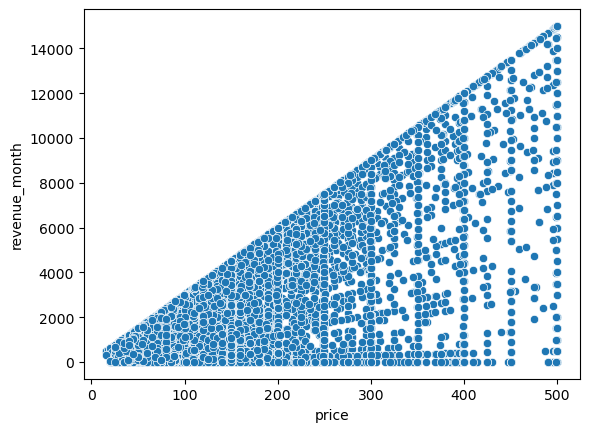

In [39]:
sns.scatterplot(data=listings_nyc_final, x="price", y="revenue_month")

<Axes: xlabel='price', ylabel='availability_30'>

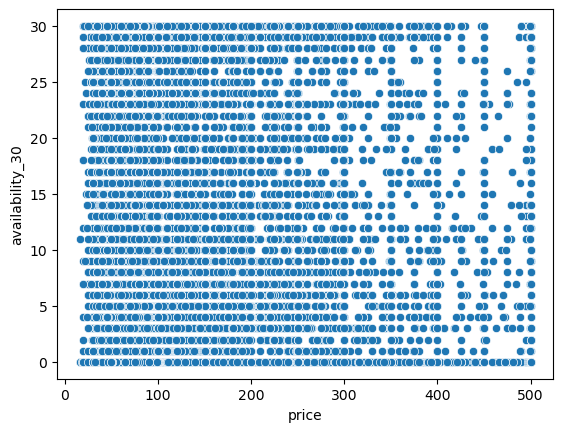

In [40]:
sns.scatterplot(data=listings_nyc_final, x="price", y="availability_30")

 - checking what might affect pricing and revenue:
     - as expected the number of people each listings accomodates and therefore bedrooms, beds, etc, have a moderate positive correlation with pricing and revenue

<Axes: >

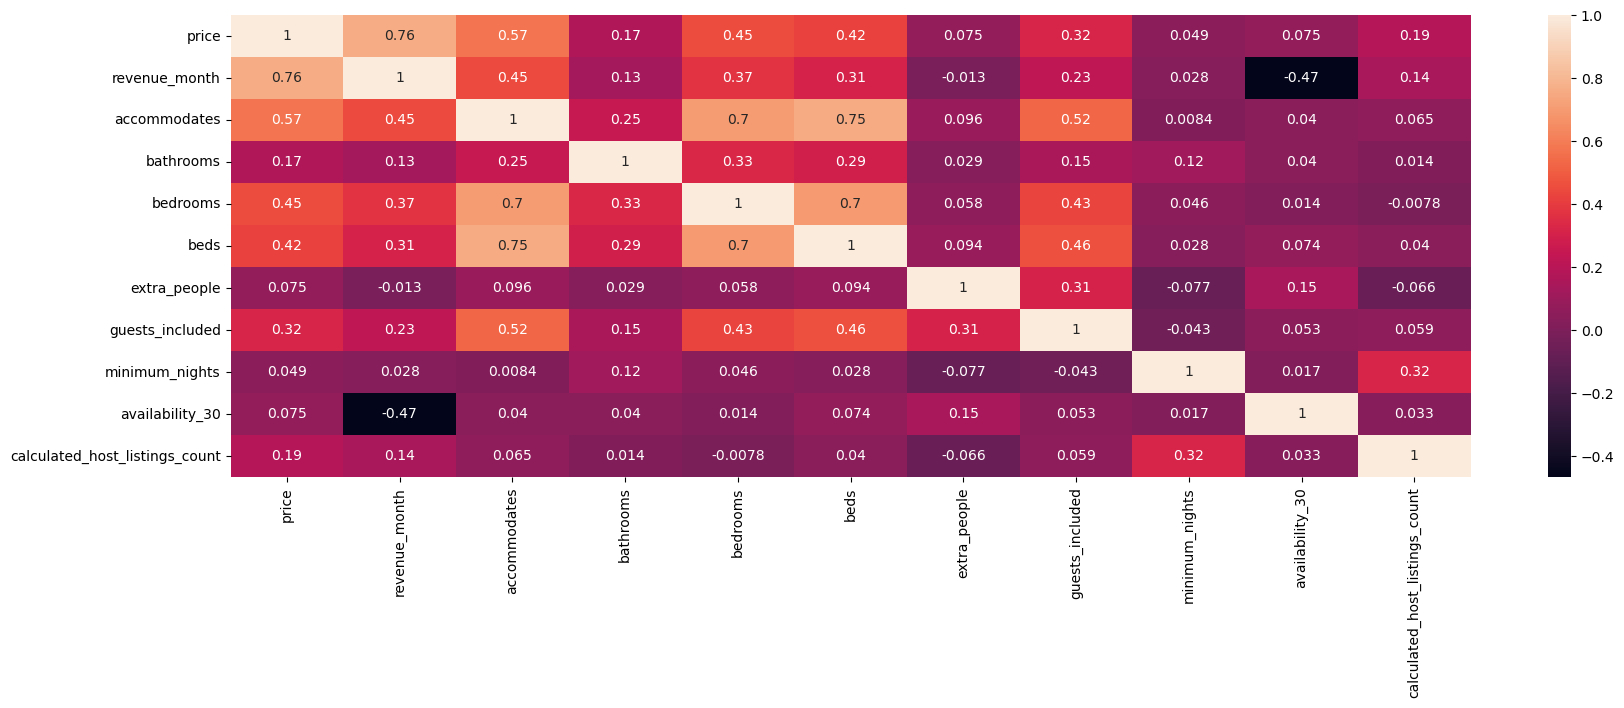

In [41]:
plt.figure(figsize=(20, 6))
subset1 = listings_nyc_final[['price','revenue_month', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'extra_people', 'guests_included', 'minimum_nights',
       'availability_30', 'calculated_host_listings_count']]
sns.heatmap(subset1.corr(), annot=True)

- I'll compare with property type now, but 1st I'm removing the types that have less than 3. Arbitrary decision.

In [42]:
counts = listings_nyc_final['property_type'].value_counts()

property_type_cleaned = listings_nyc_final[~listings_nyc_final['property_type'].isin(counts[counts < 4].index)]

property_type_cleaned.property_type.value_counts()



Apartment             24517
House                  2122
Condominium             981
Townhouse               770
Loft                    740
Serviced apartment      290
Hotel                   192
Guest suite             137
Boutique hotel          104
Other                    65
Bed and breakfast        63
Hostel                   43
Resort                   25
Guesthouse               24
Bungalow                 19
Aparthotel               11
Villa                     9
Tiny house                7
Cabin                     4
Earth house               4
Name: property_type, dtype: int64

- Below we can see that the property types do affect pricing and revenue, with resort and apart hotel being the most expensive ones and generating more revenue

<Axes: xlabel='property_type', ylabel='price'>

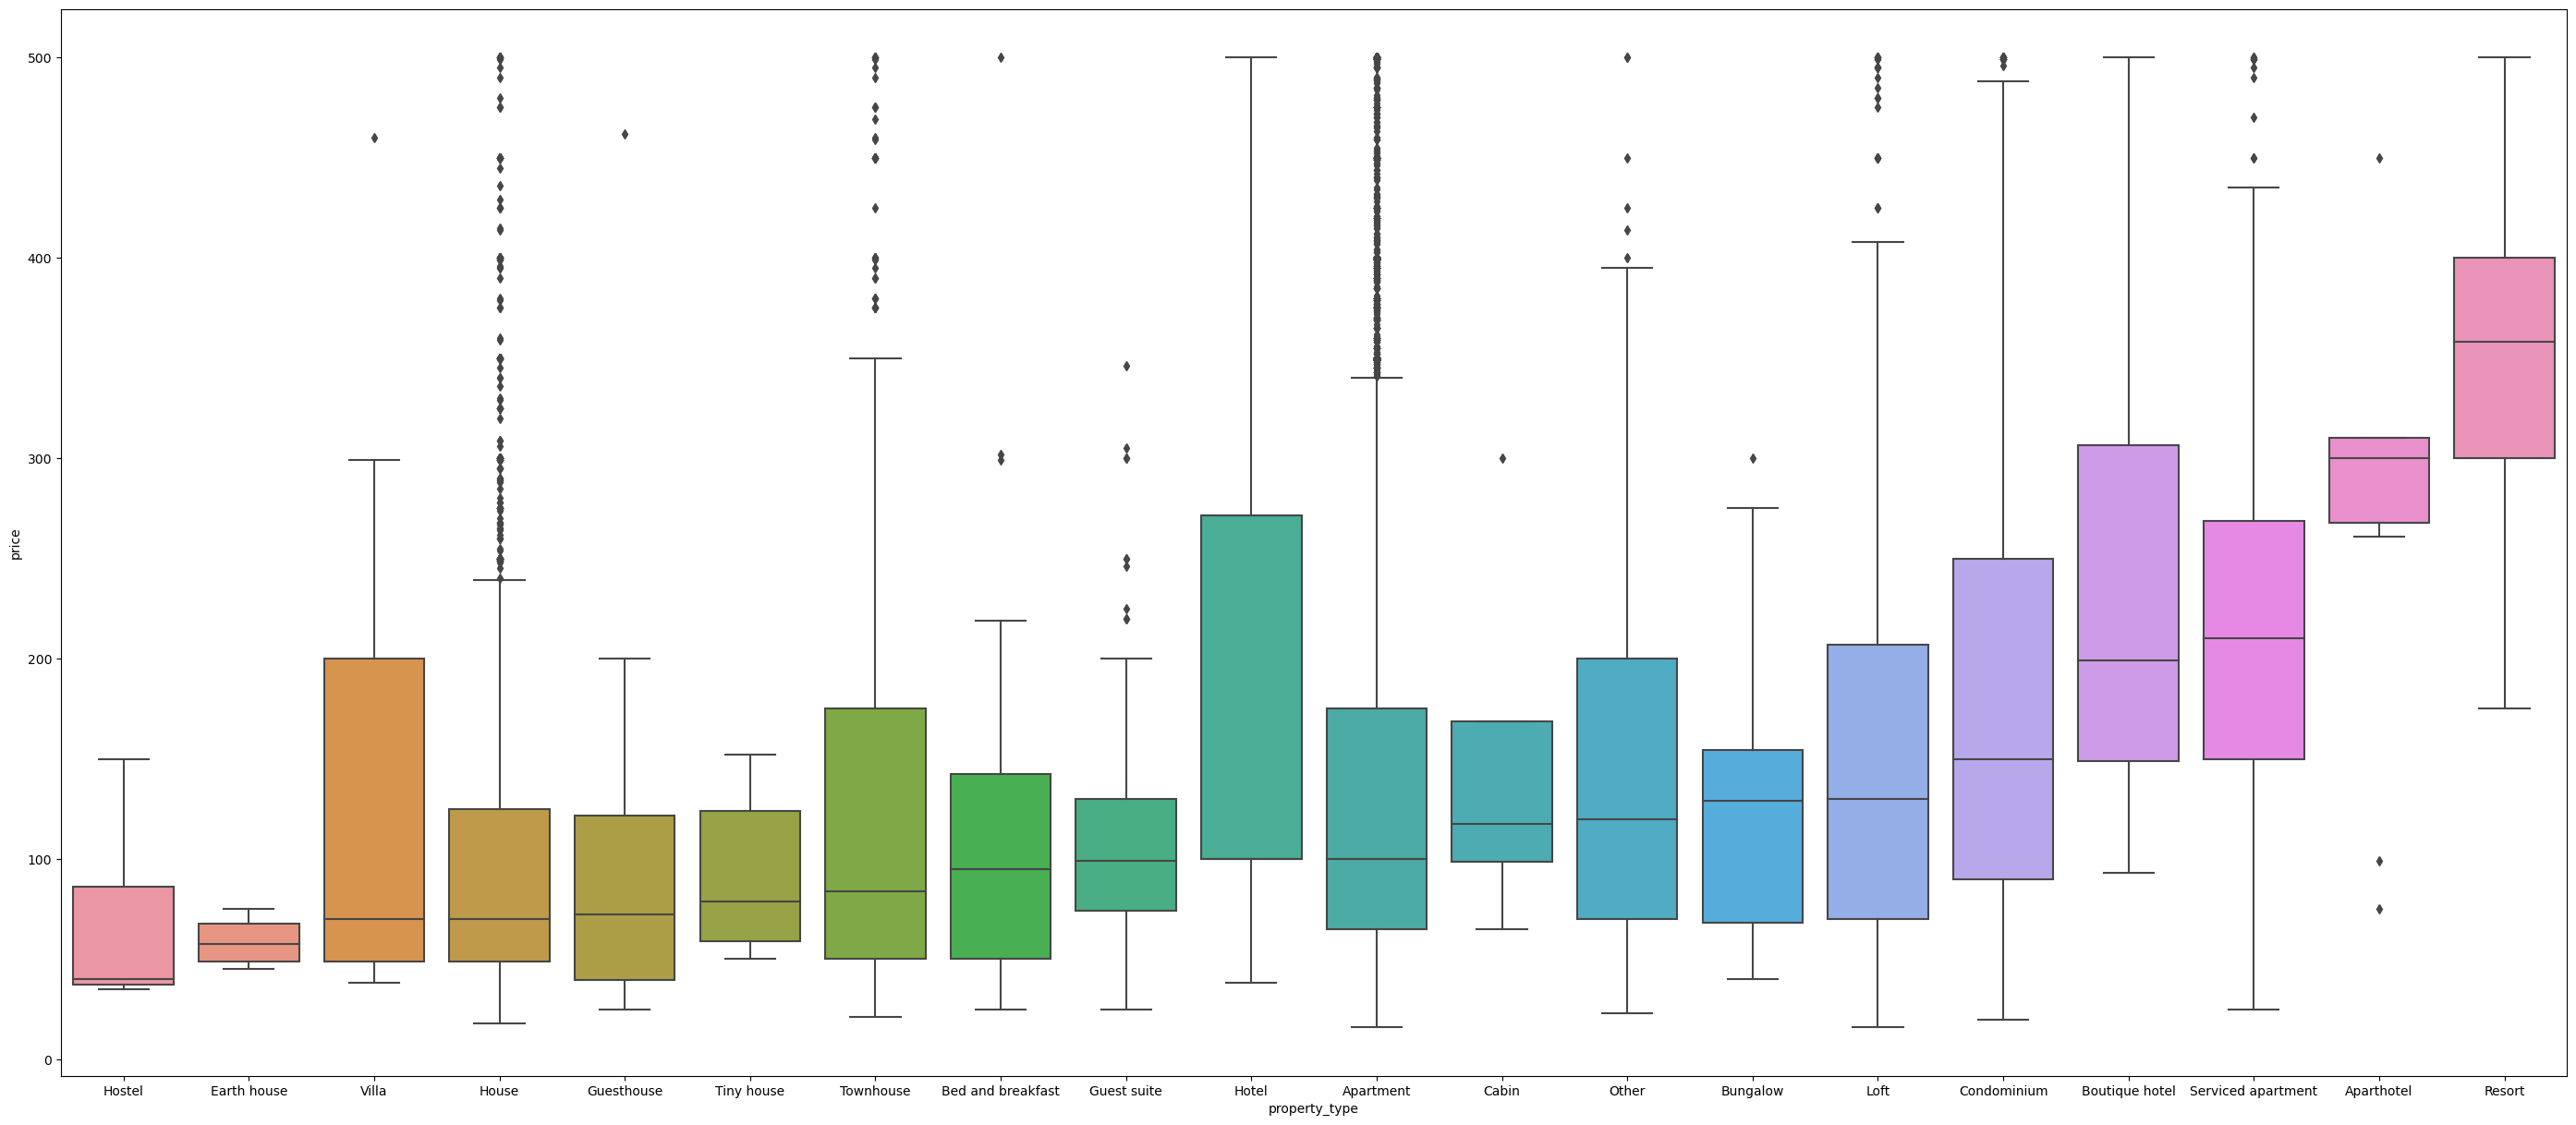

In [43]:
plt.figure(figsize=(35, 15))

sorted_nb = property_type_cleaned.groupby(['property_type'])['price'].median().sort_values()
sns.boxplot(x=property_type_cleaned['property_type'], y=property_type_cleaned['price'], order=list(sorted_nb.index))

<Axes: xlabel='property_type', ylabel='revenue_month'>

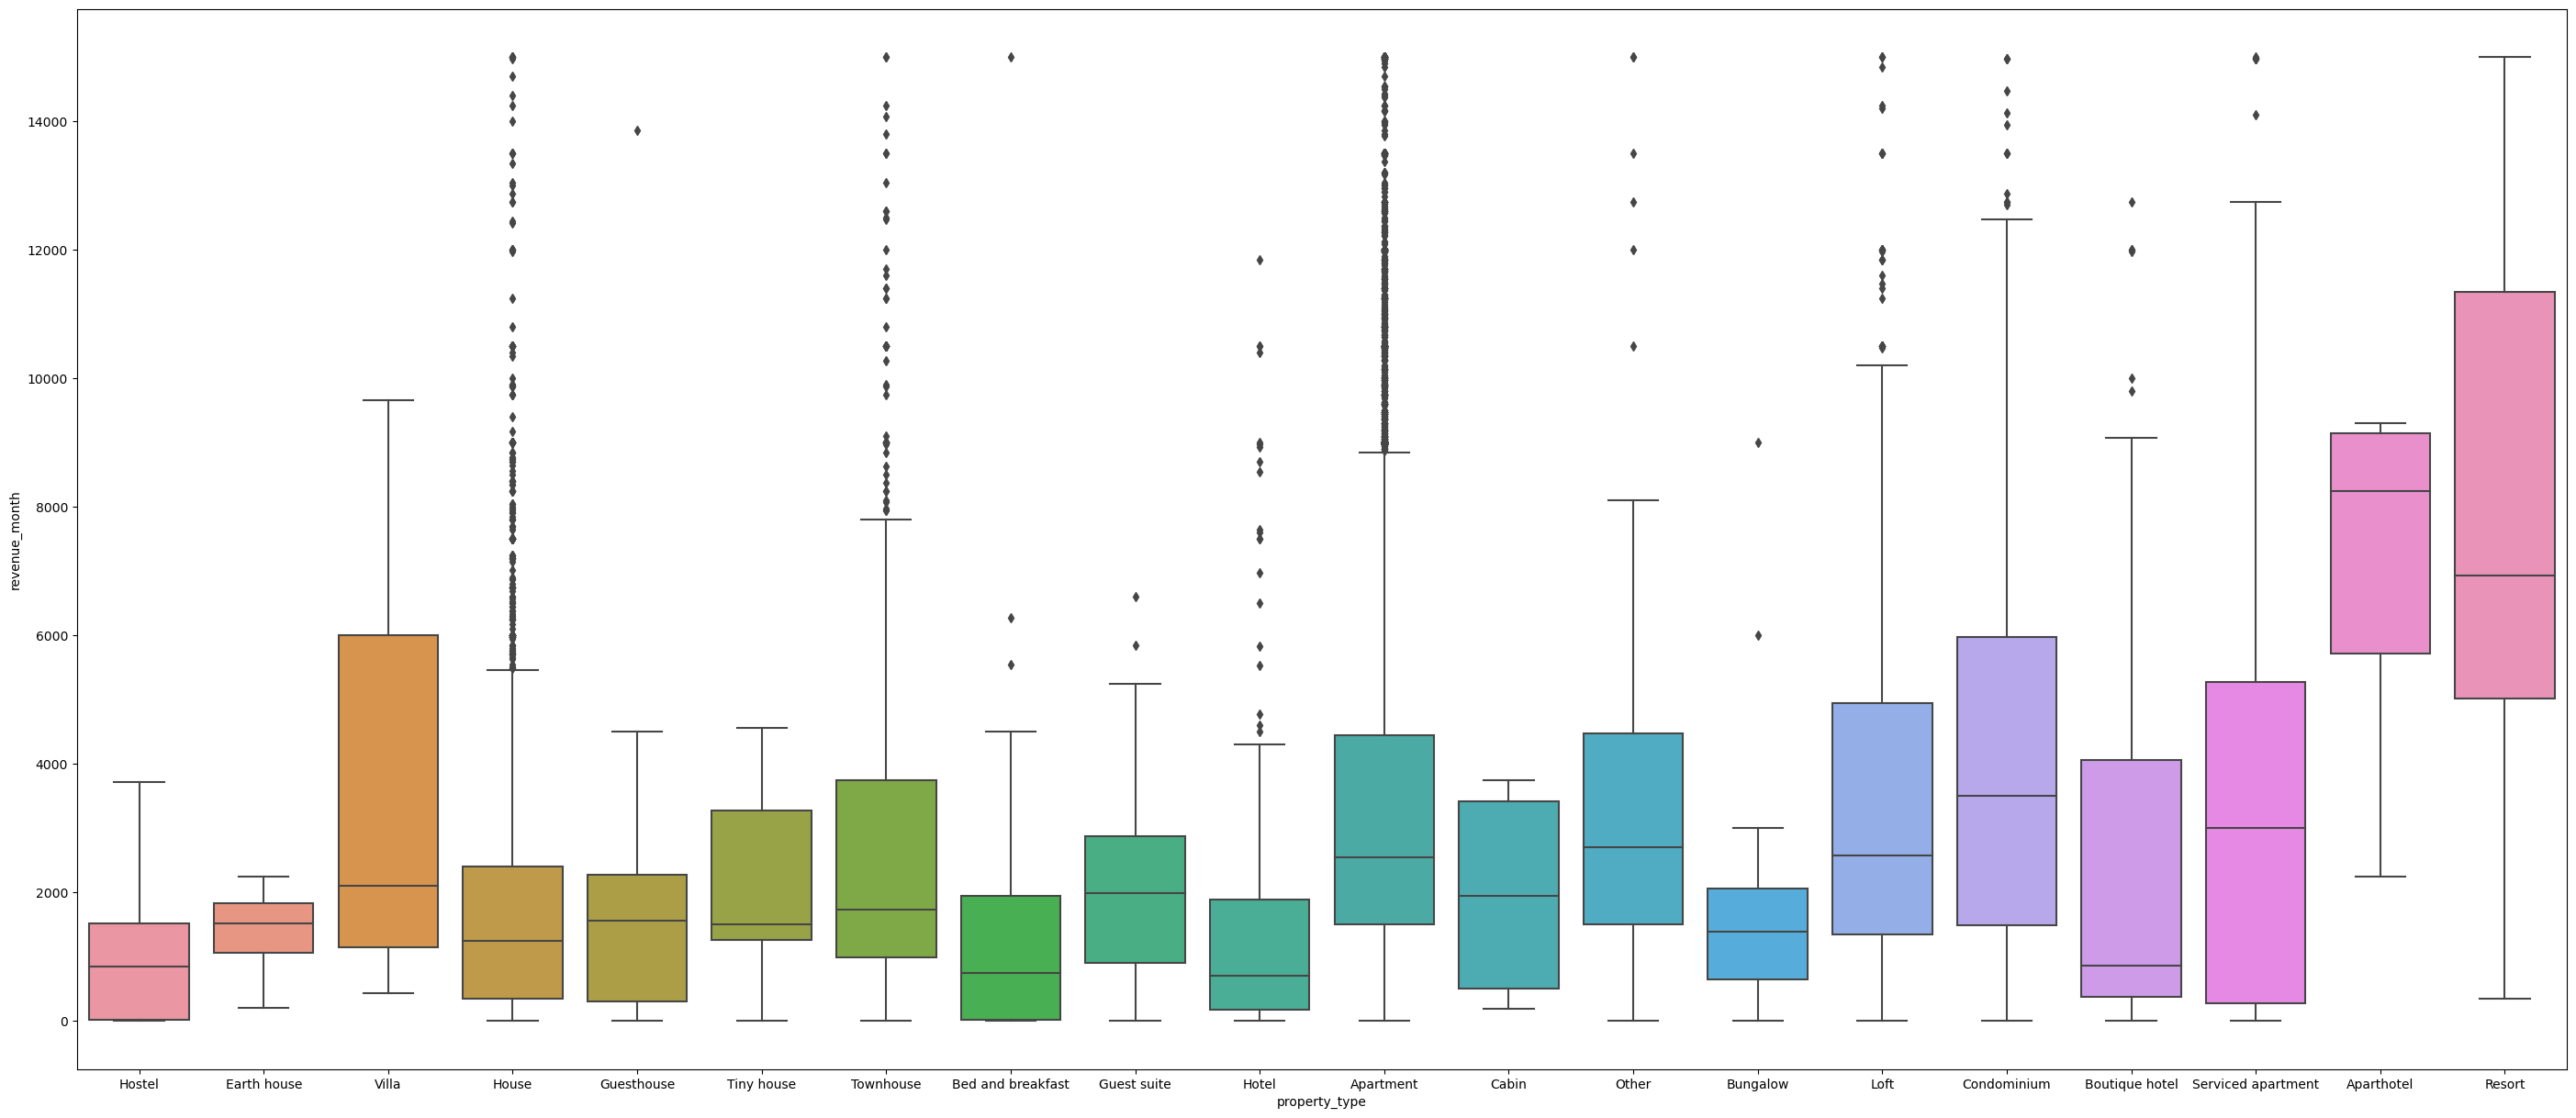

In [44]:
plt.figure(figsize=(35, 15))

sorted_nb2 = property_type_cleaned.groupby(['property_type'])['revenue_month'].median().sort_values()
sns.boxplot(x=property_type_cleaned['property_type'], y=property_type_cleaned['revenue_month'], order=list(sorted_nb.index))

here I just wanted to take a look at the columns again

In [45]:
listings_nyc_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30149 entries, 0 to 30178
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              30149 non-null  int64  
 1   host_id                         30149 non-null  int64  
 2   host_is_superhost               30140 non-null  float64
 3   neighbourhood                   30140 non-null  object 
 4   latitude                        30149 non-null  float64
 5   longitude                       30149 non-null  float64
 6   property_type                   30149 non-null  object 
 7   room_type                       30149 non-null  object 
 8   accommodates                    30149 non-null  int64  
 9   bathrooms                       30149 non-null  float64
 10  bedrooms                        30149 non-null  int64  
 11  beds                            30149 non-null  int64  
 12  bed_type                        

- Cancellation policy:
    - more expensive listings have more strict cancelation policies, which makes sense
    - not sure what to make of the revenue box

<Axes: xlabel='price', ylabel='cancellation_policy'>

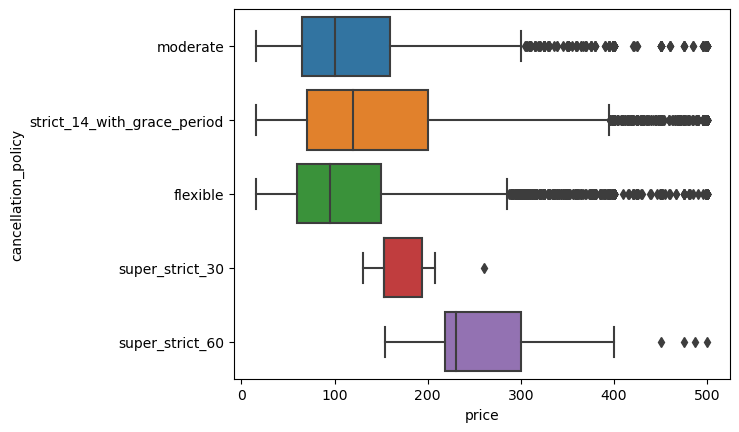

In [46]:
sns.boxplot(
    data=listings_nyc_final,
    x = "price",
    y ="cancellation_policy",
)

<Axes: xlabel='revenue_month', ylabel='cancellation_policy'>

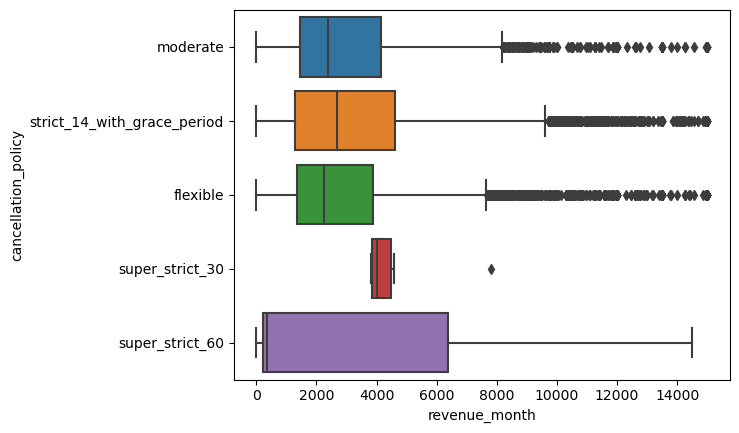

In [47]:
sns.boxplot(
    data=listings_nyc_final,
    x = "revenue_month",
    y ="cancellation_policy",
)

 - below we can see that entire homes are more expensive and generate more highest revenue, which makes sense

<Axes: xlabel='price', ylabel='Count'>

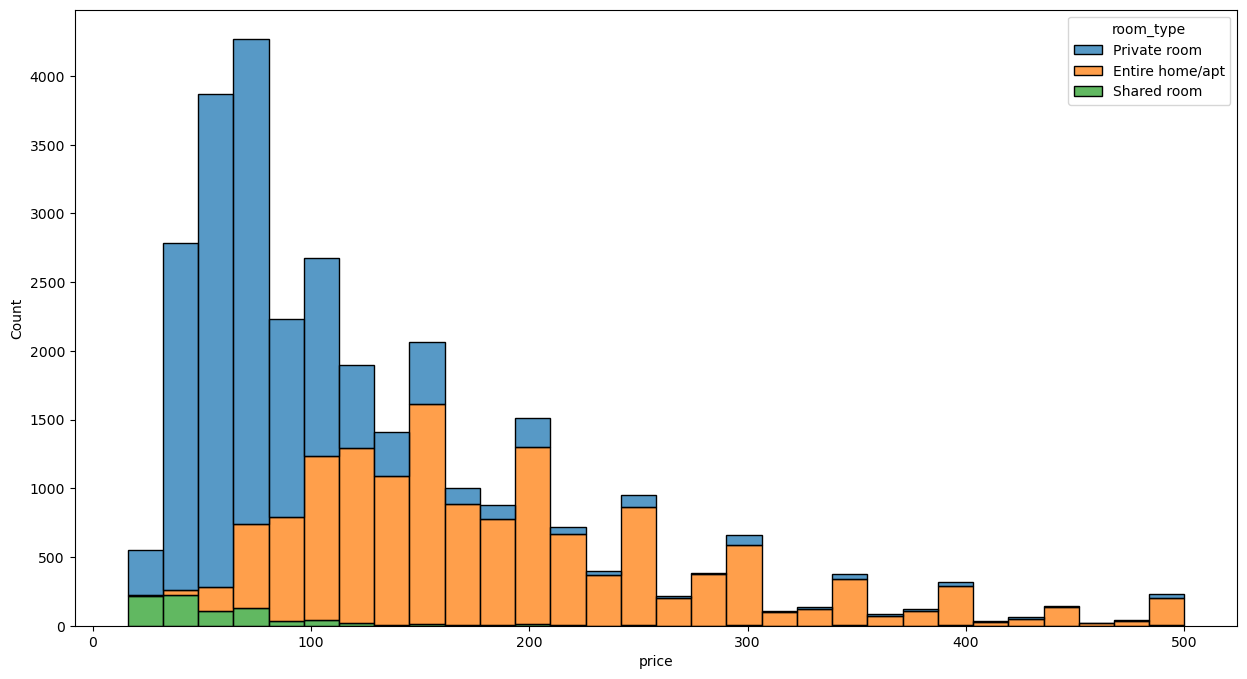

In [48]:
plt.figure(figsize=(15, 8))
sns.histplot(data=listings_nyc_final, x="price", hue="room_type", multiple="stack", bins =30)

<Axes: xlabel='revenue_month', ylabel='Count'>

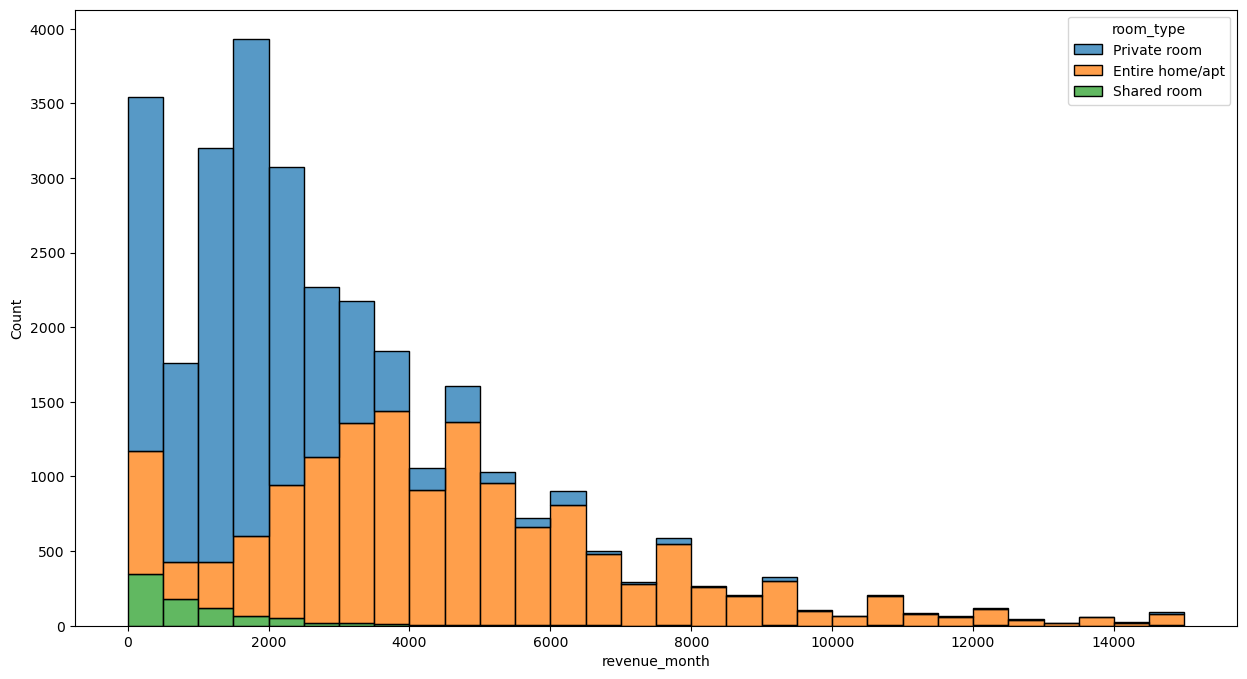

In [49]:
plt.figure(figsize=(15, 8))
sns.histplot(data=listings_nyc_final, x="revenue_month", hue="room_type", multiple="stack", bins =30)

 - below I added the countplot graph just to show that it doesn't make sense to analyse by bed type, as the other types are insignificant

<Axes: xlabel='bed_type', ylabel='count'>

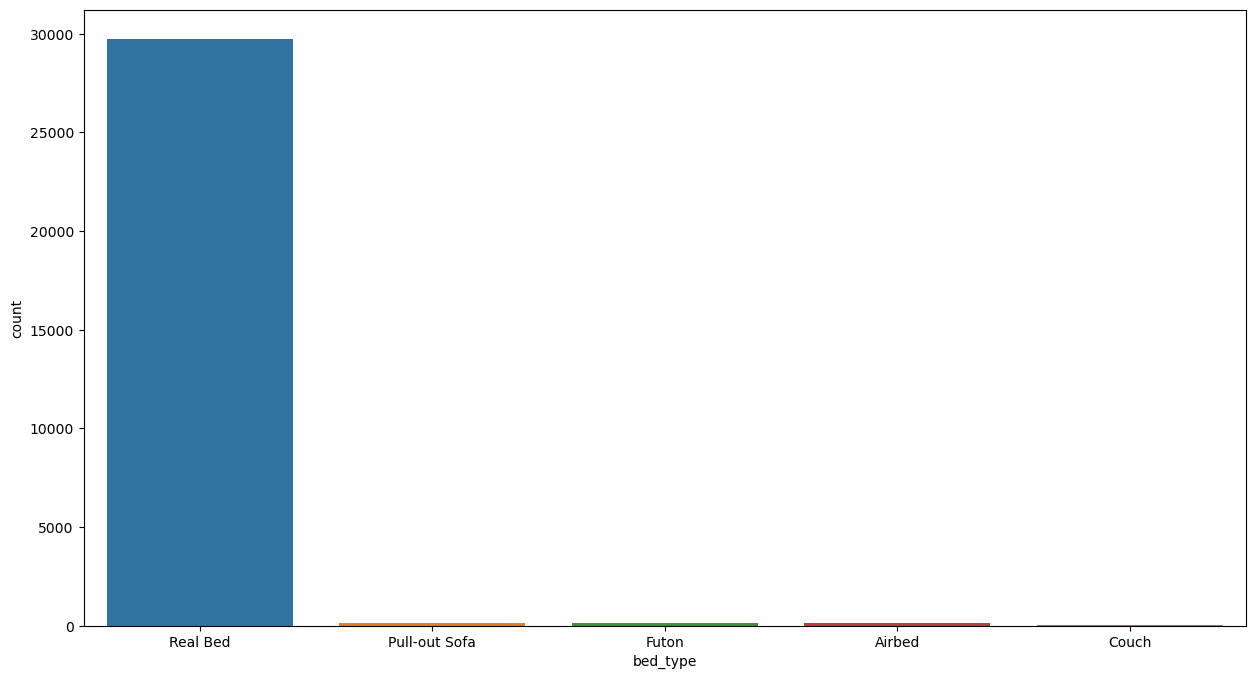

In [50]:
plt.figure(figsize=(15, 8))

sns.countplot(
    data=listings_nyc_final, 
    x="bed_type"
)

 - Here I wanted to test the kdeplot and see if it works well with a continuous variable and a dichotomous variable
     - my interpretation would be that beig a super host or not doesn't affect pricing nor montlhy revenue

<Axes: xlabel='price', ylabel='Density'>

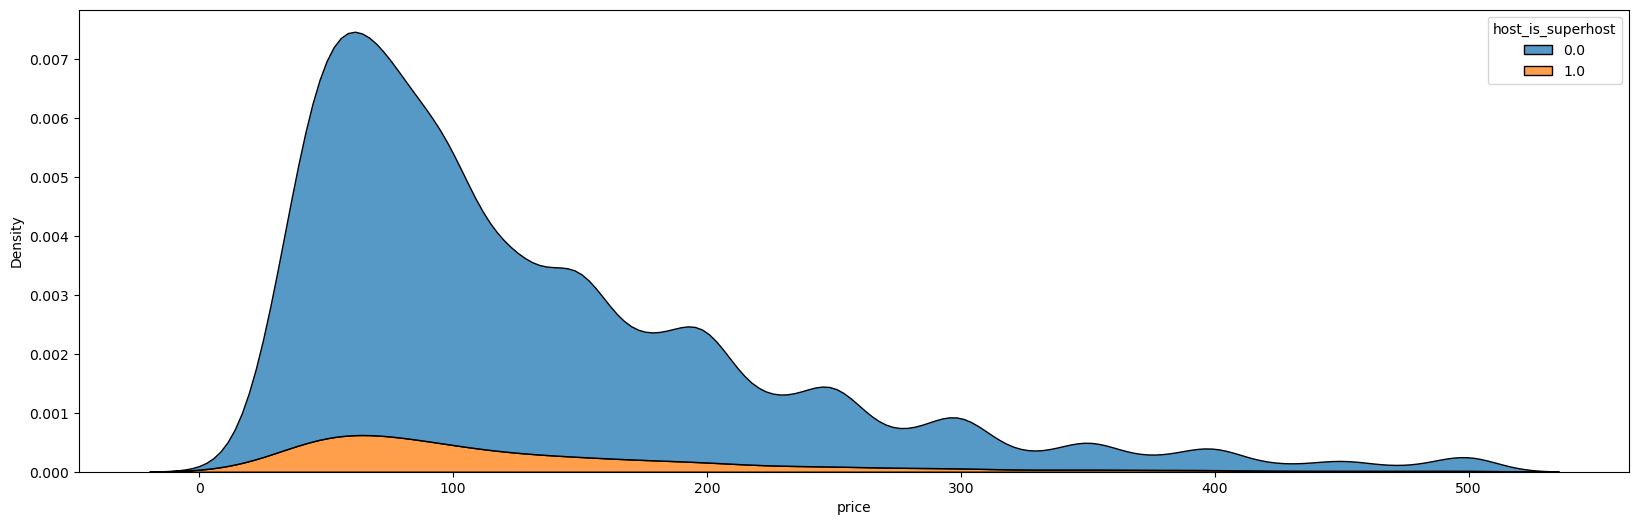

In [51]:
listings_nyc_final['host_is_superhost'] = listings_nyc_final['host_is_superhost'].fillna(0)

plt.figure(figsize=(20, 6))
sns.kdeplot(data=listings_nyc_final, x="price", hue="host_is_superhost", multiple="stack")

<Axes: xlabel='revenue_month', ylabel='Density'>

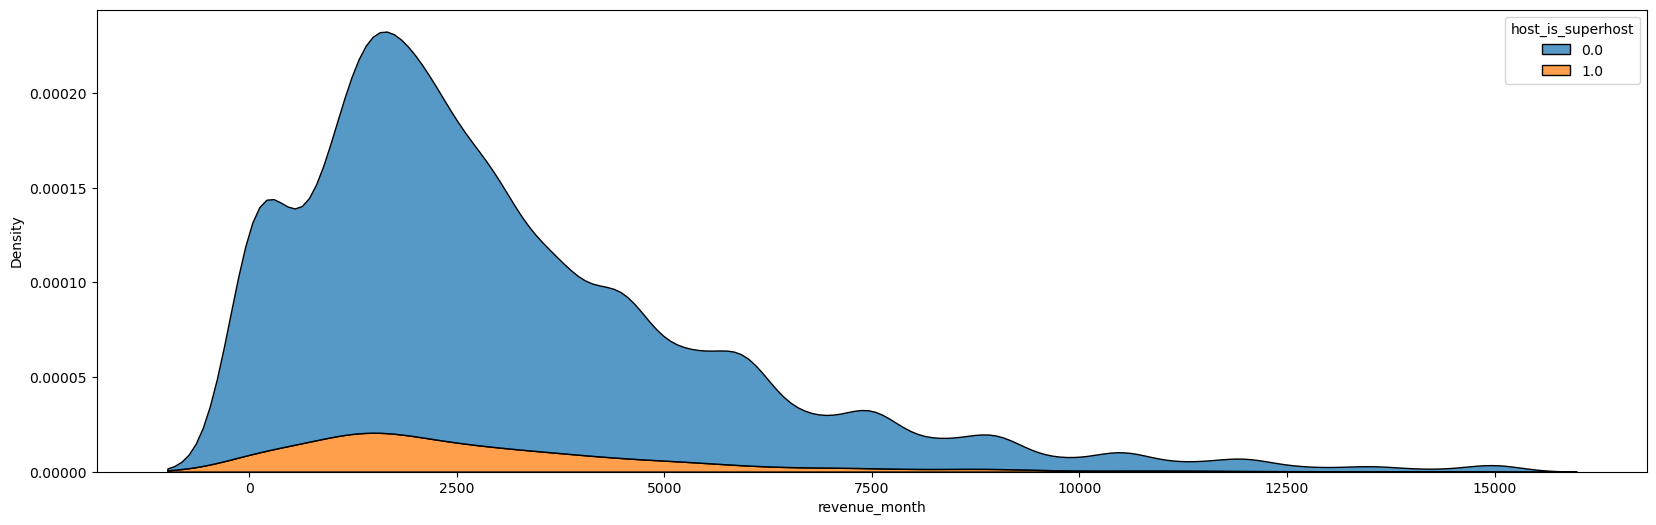

In [52]:
plt.figure(figsize=(20, 6))
sns.kdeplot(data=listings_nyc_final, x="revenue_month", hue="host_is_superhost", multiple="stack")

- Another way to check the relantionship between continuous and dichotomous variable
 - instant booking option doesn't affect pricing/revenue

<Axes: xlabel='instant_bookable', ylabel='price'>

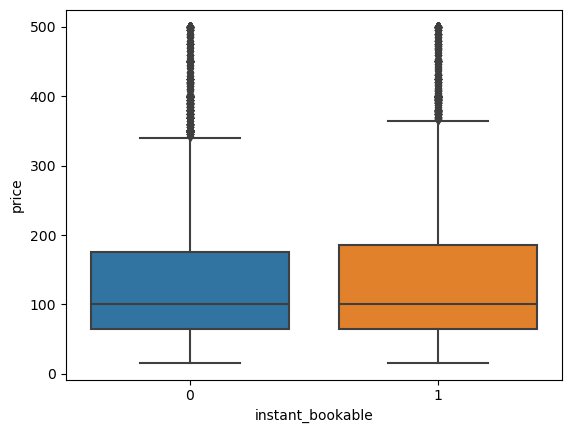

In [53]:
sns.boxplot(data = listings_nyc_final, x = "instant_bookable", y = "price")

<Axes: xlabel='instant_bookable', ylabel='revenue_month'>

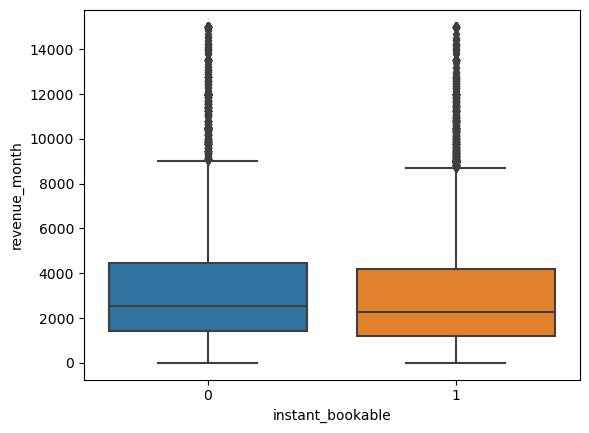

In [54]:
sns.boxplot(data = listings_nyc_final, x = "instant_bookable", y = "revenue_month")

- Recap:

'external_amenities' group with: 'bbq', 'balcony', 'nature_and_views', 'outdoor_space', 'hot_tub_sauna_or_pool'

building_offers' group with: 'elevator', 'gym', 'parking', 'private_entrance', 'self_check_in', 'secure', 'smoking_allowed', 'accessible', 'event_suitable', 'pets_allowed', 'child_friendly'

'internal_amenities' group with: 'air_conditioning', 'bed_linen', 'tv', 'coffee_machine', 'cooking_basics', 'white_goods', 'internet', 'high_end_electronics'

'extras' group with: 'breakfast', 'host_greeting', 'long_term_stays', 'check_in_24h'


## Does the below make sense?

Text(0.5, 0.98, 'Amenities graphs')

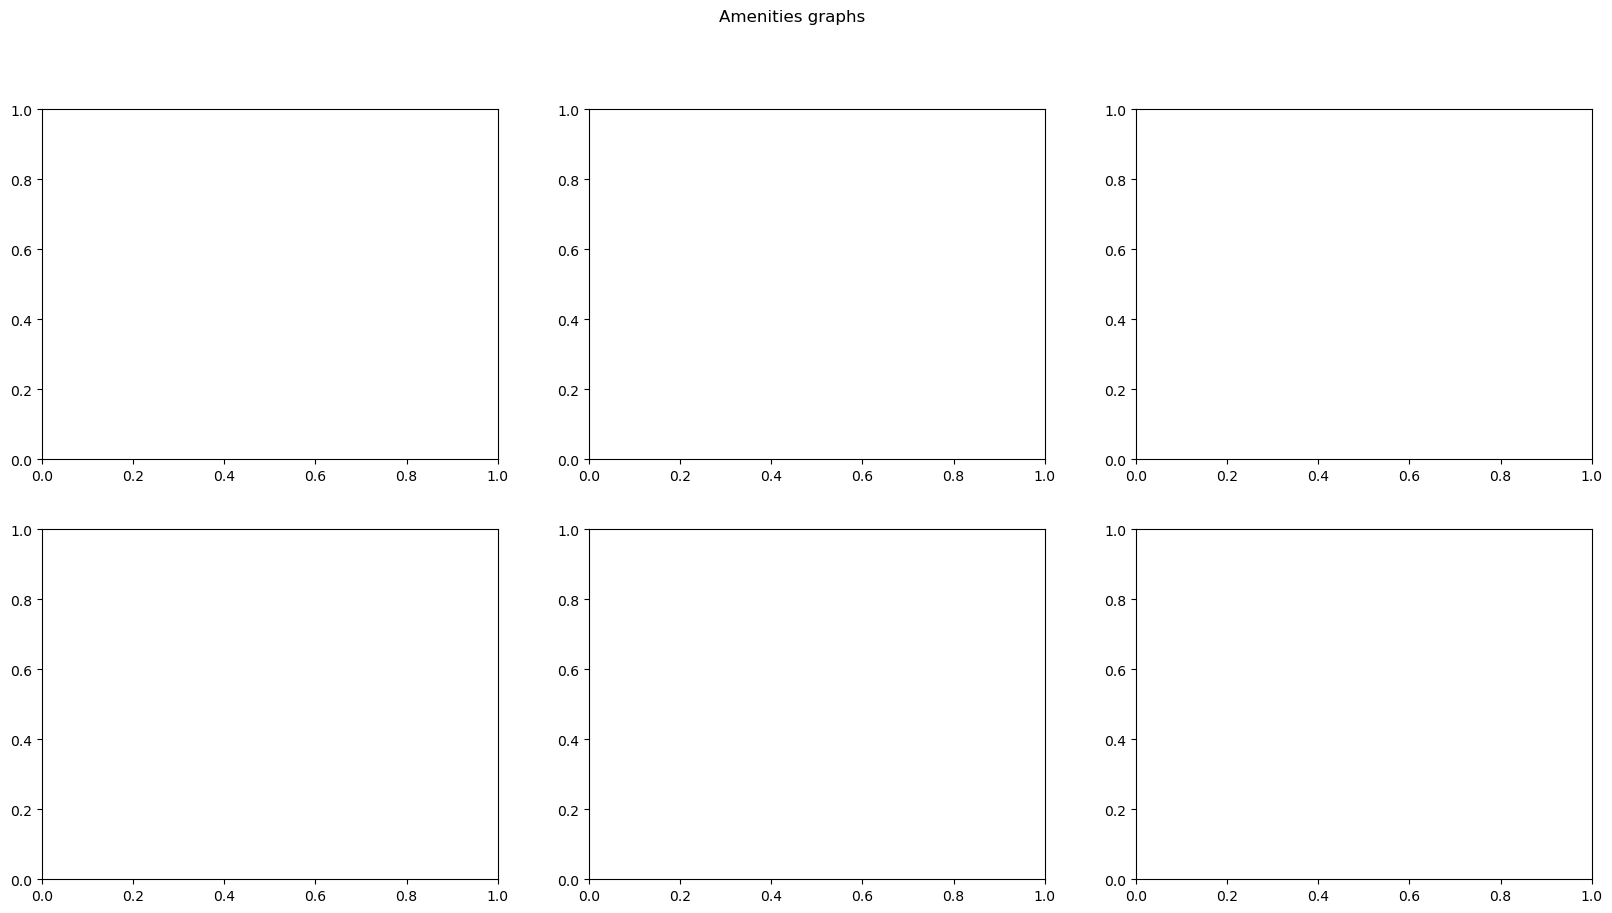

In [55]:
fig, axes = plt.subplots(
    nrows=2, 
    ncols=3,
    figsize=(20,10)
)

fig.suptitle("Amenities graphs")

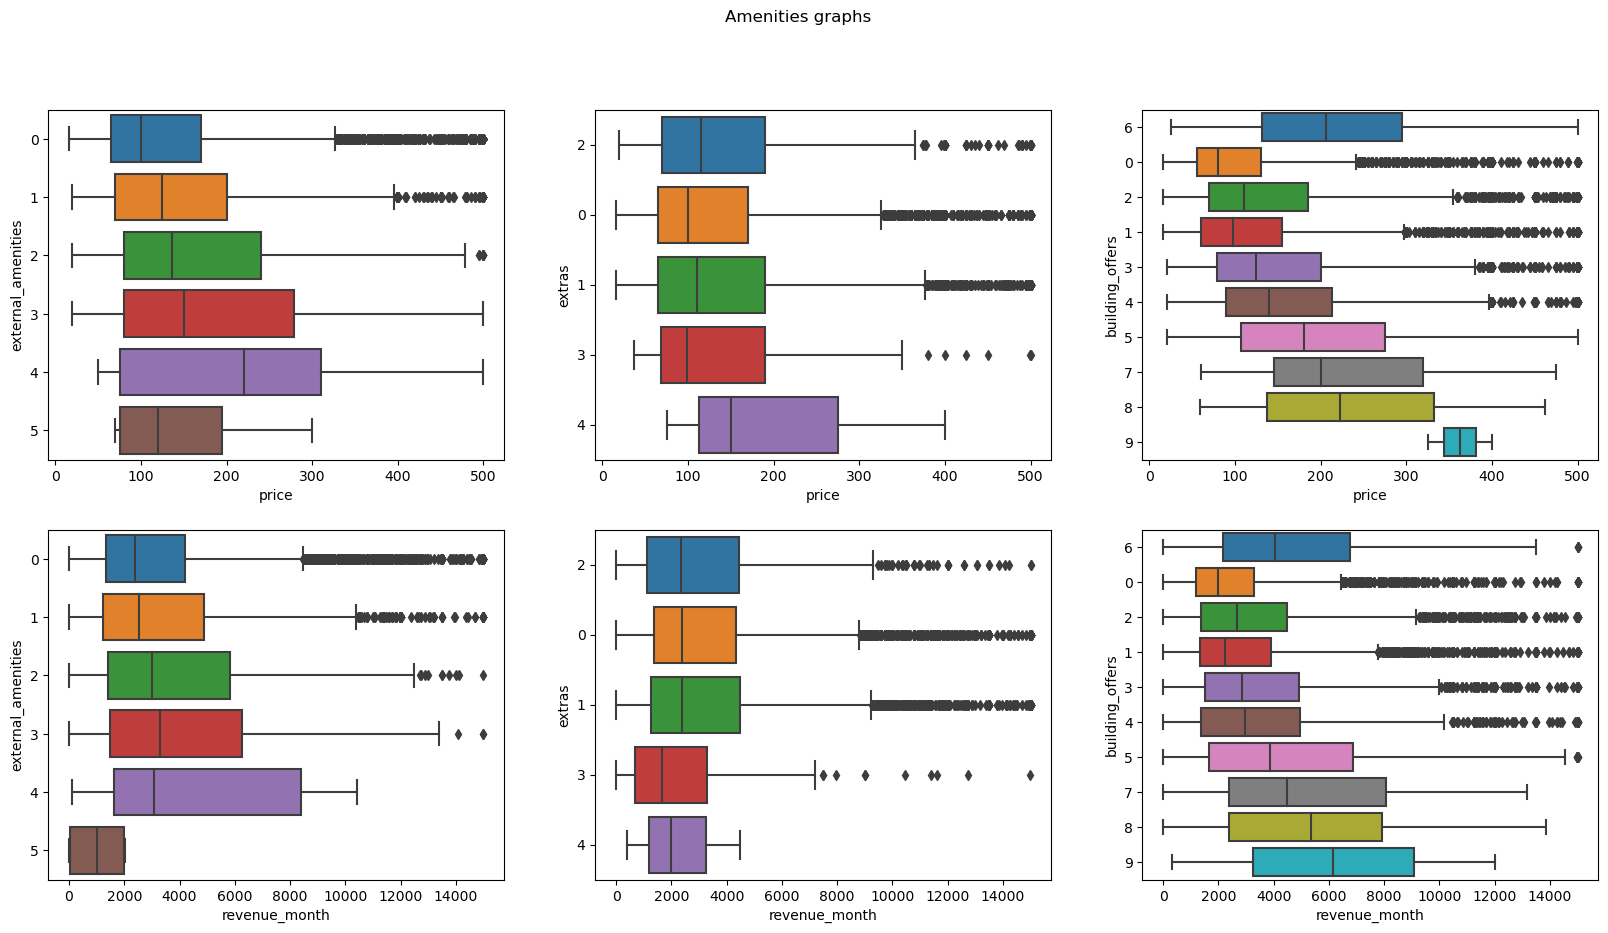

In [56]:
listings_nyc_final['extras'] = listings_nyc_final['extras'].apply(str)
listings_nyc_final['external_amenities'] = listings_nyc_final['external_amenities'].apply(str)
listings_nyc_final['building_offers'] = listings_nyc_final['building_offers'].apply(str)

sns.boxplot(
    data = listings_nyc_final,
    x = "price",
    y = "external_amenities",
    ax = axes[0,0]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "price",
    y = "extras",
    ax = axes[0,1]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "price",
    y = "building_offers",
    ax = axes[0,2]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "revenue_month",
    y = "external_amenities",
    ax = axes[1,0]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "revenue_month",
    y = "extras",
    ax = axes[1, 1]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "revenue_month",
    y = "building_offers",
    ax = axes[1,2]
)


fig

Text(0.5, 0.98, 'Internal amenities graphs')

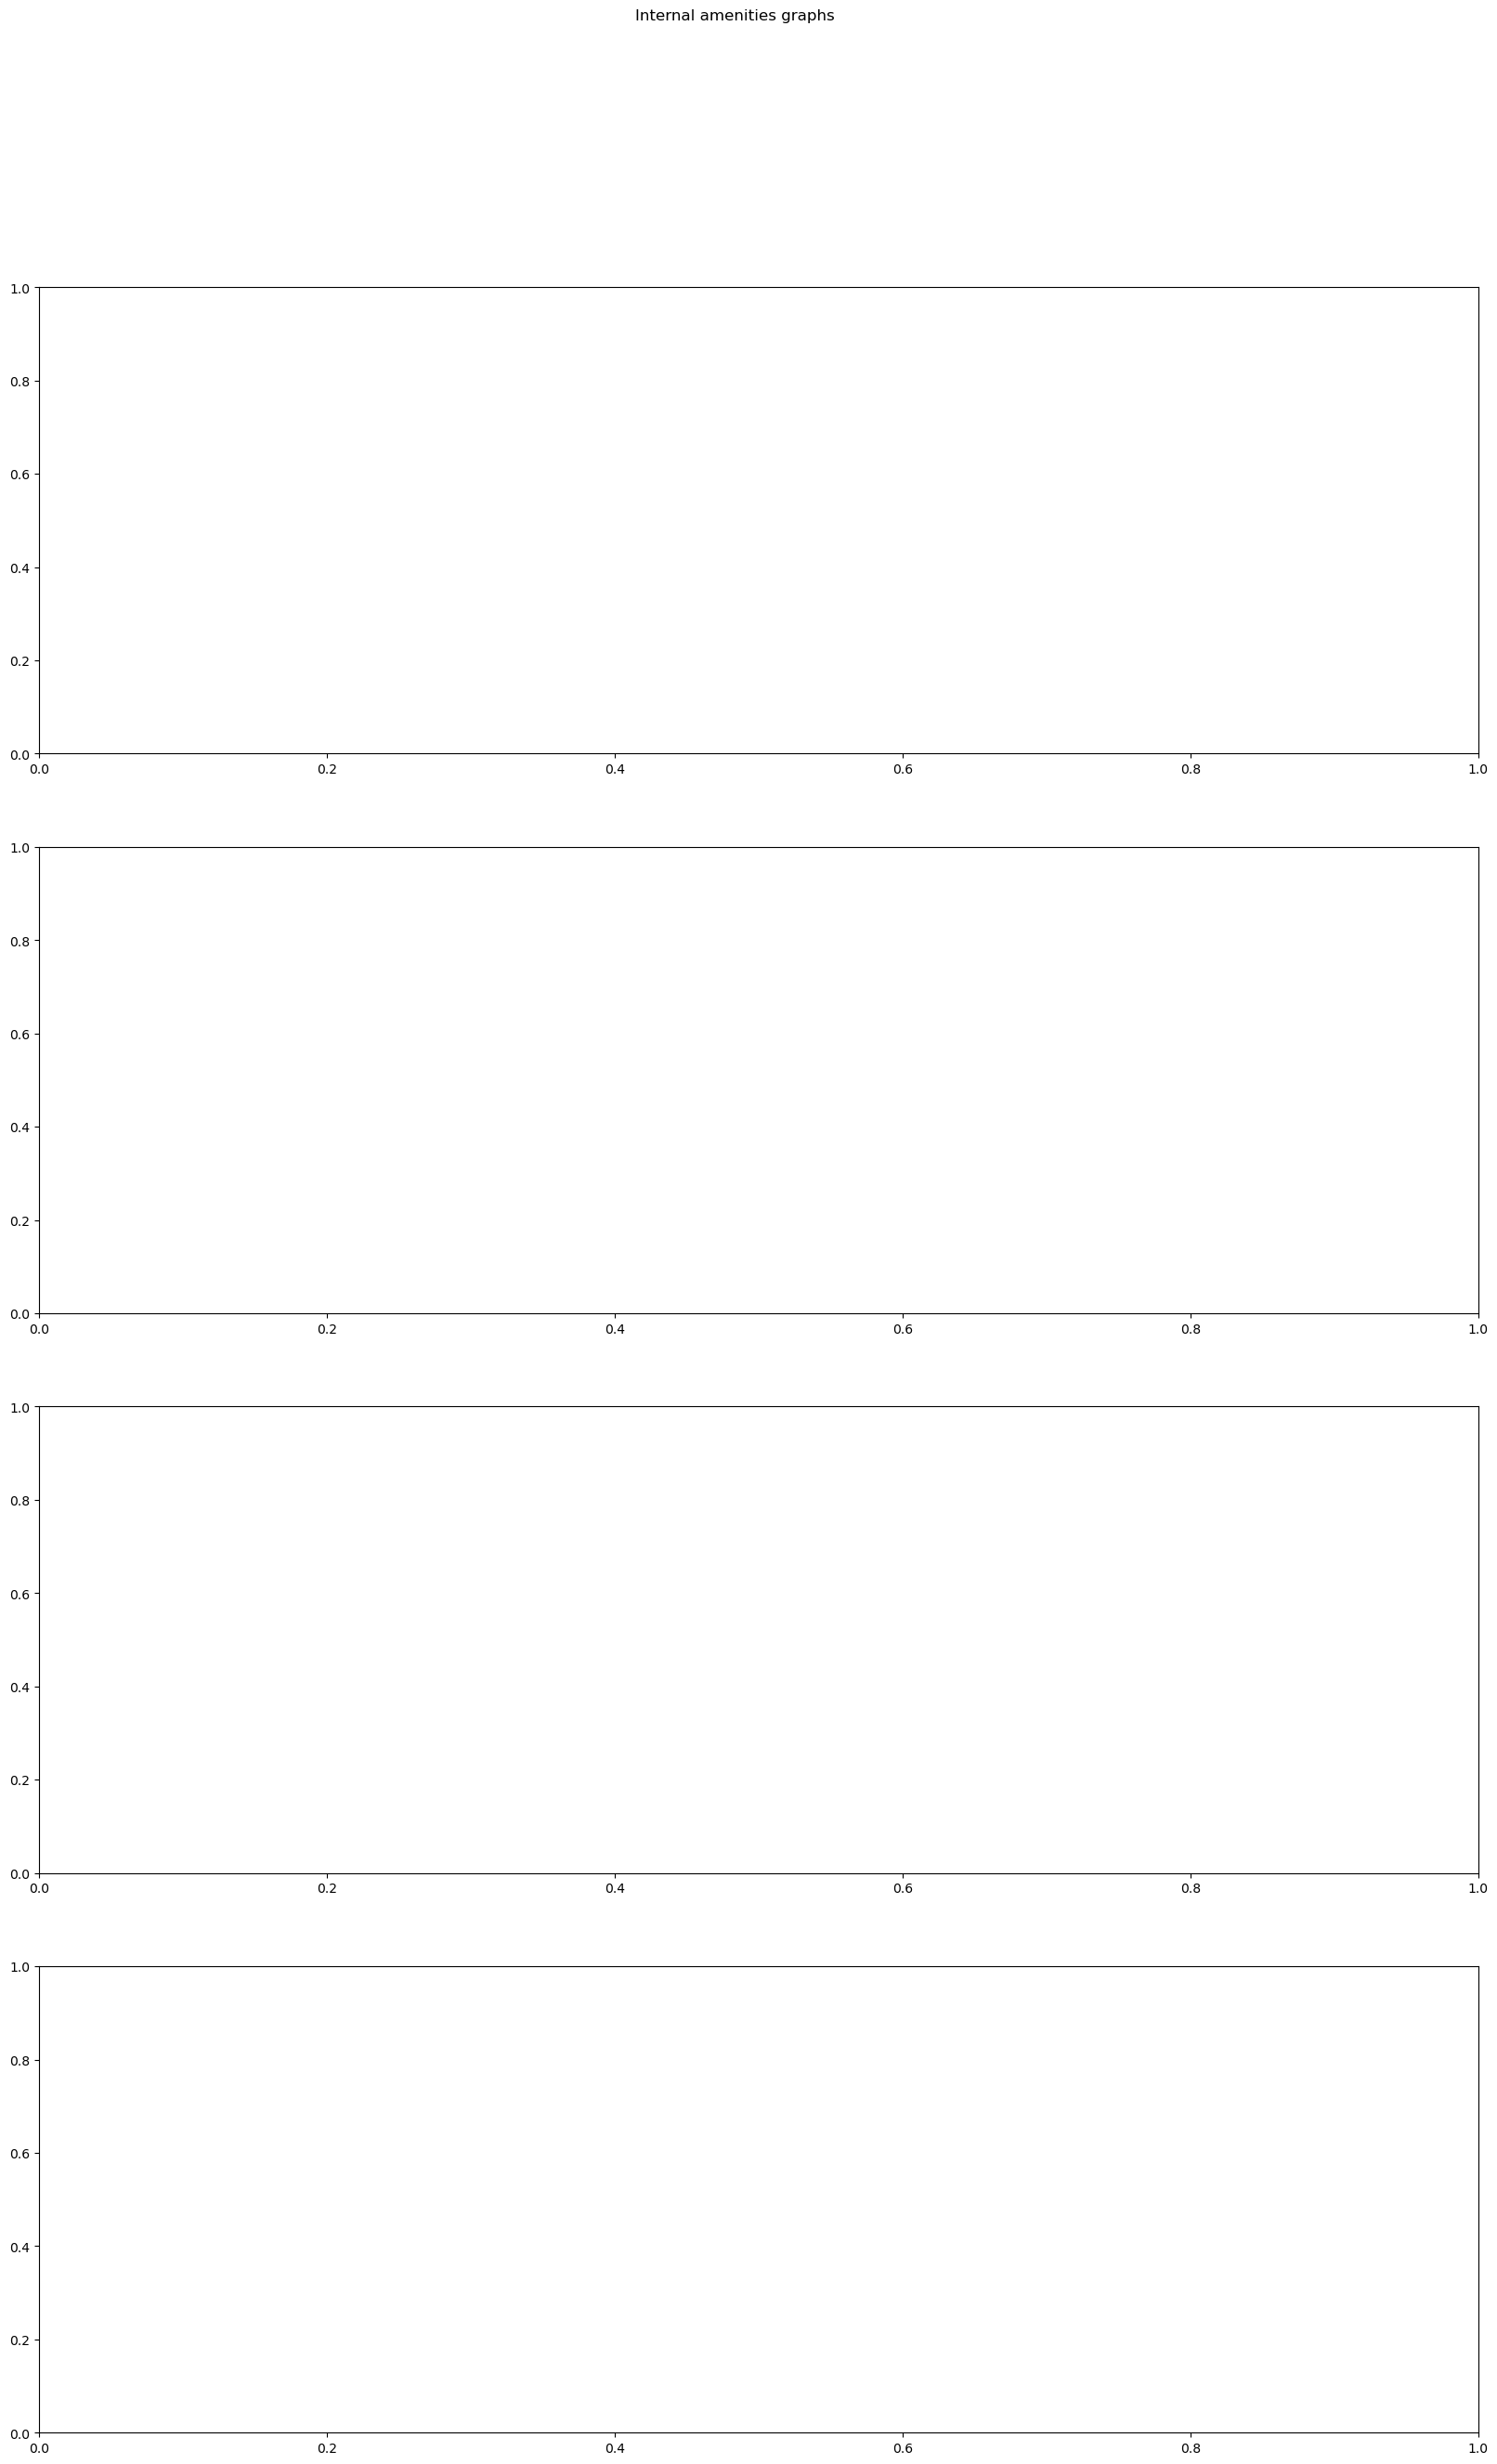

In [57]:
fig2, axes = plt.subplots(
    nrows=4, 
    ncols=1,
    figsize=(20, 30)
)

fig2.suptitle("Internal amenities graphs")

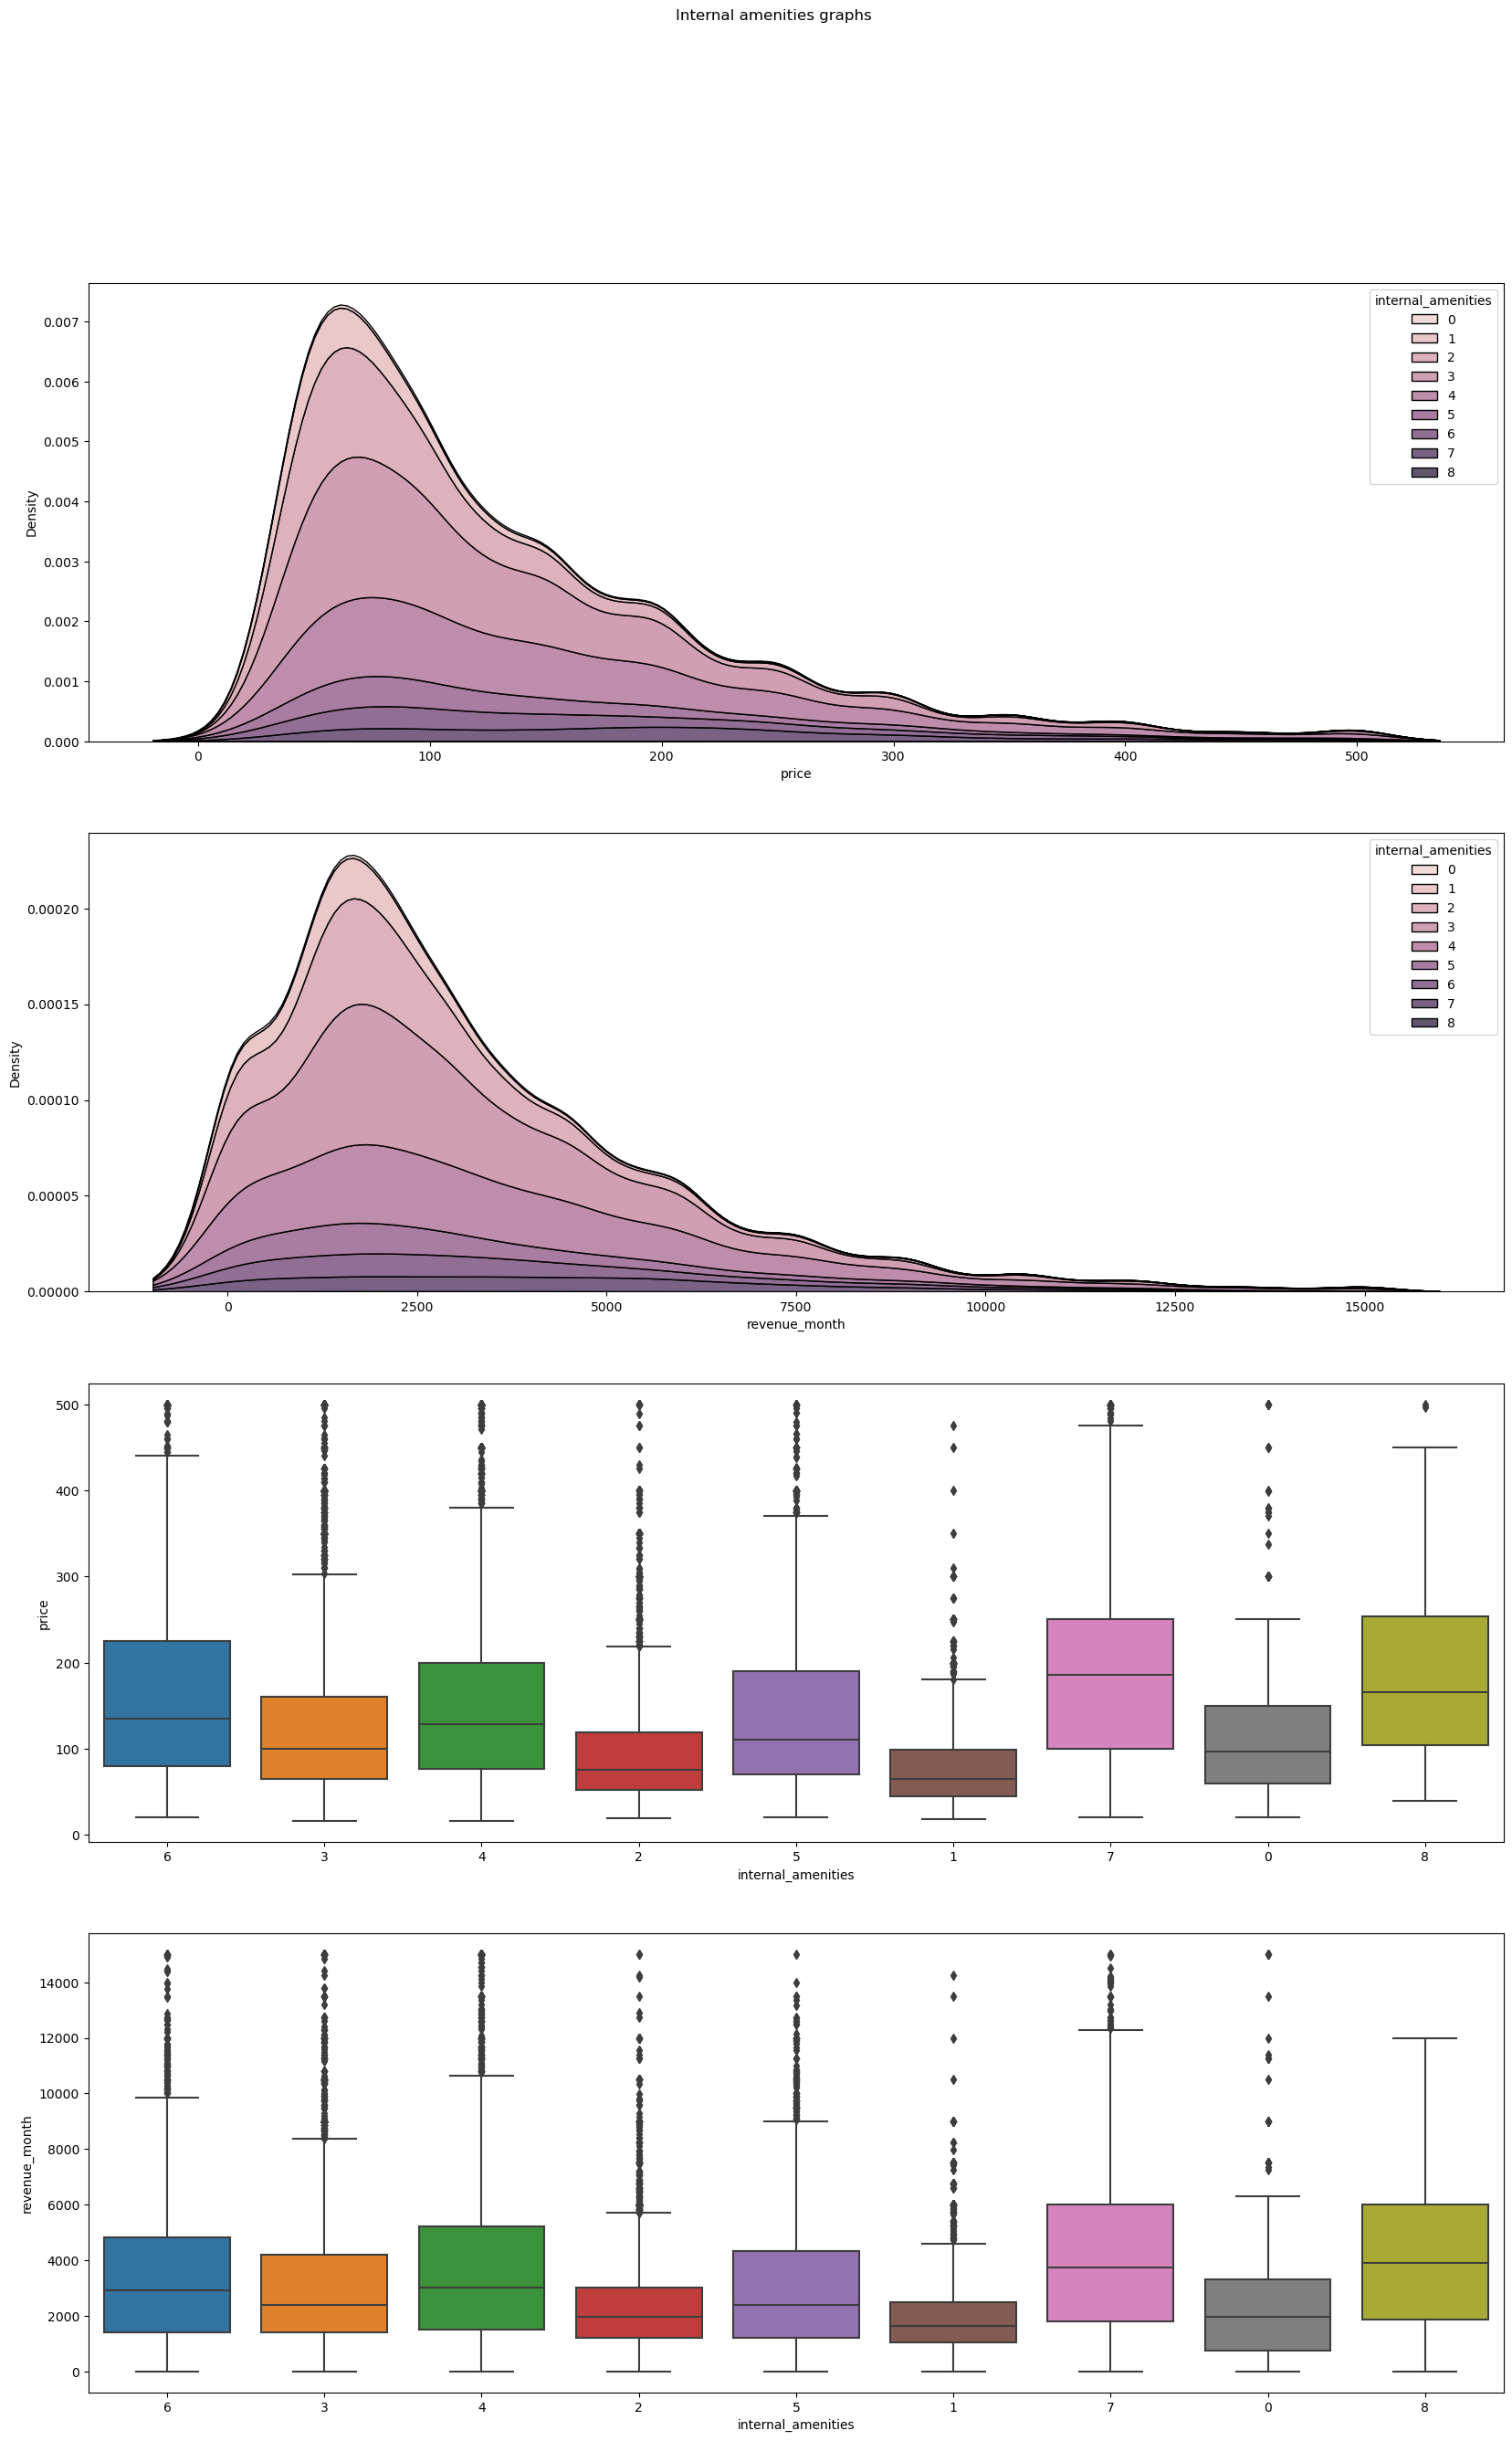

In [58]:
sns.kdeplot(
    data = listings_nyc_final,
    x = "price",
    hue = "internal_amenities",
    multiple = "stack",
    ax = axes[0]
)

sns.kdeplot(
    data = listings_nyc_final,
    x = "revenue_month",
    hue = "internal_amenities",
    multiple = "stack",
    ax = axes[1]
)

listings_nyc_final['internal_amenities'] = listings_nyc_final['internal_amenities'].apply(str)

sns.boxplot(
    data = listings_nyc_final,
    x = "internal_amenities",
    y = "price",
    ax = axes[2]
)

sns.boxplot(
    data = listings_nyc_final,
    x = "internal_amenities",
    y = "revenue_month",
    ax = axes[3]
)

fig2

### Neighborhood

latitude and longitude taken randomly, will adjust

In [59]:
from folium.plugins import HeatMap
folium_hmap = folium.Map(location=[40.86754,-73.92639], 
                         zoom_start=12, 
                         tiles="OpenStreetMap")
folium_hmap

 - It seems that both pricing and monthly revenue peak in the same areas

In [60]:
folium_hmap.add_child(
    HeatMap(
        listings_nyc_final[['latitude','longitude','price']],
        min_opacity = 0.2,
        radius = 8,
        blur = 6
    )
)


In [61]:
folium_hmap.add_child(
    HeatMap(
        listings_nyc_final[['latitude','longitude','revenue_month']],
        min_opacity = 0.2,
        radius = 8,
        blur = 6
    )
)

 - Grabbing just 'neighbourhood' and 'revenue_month' so I can make a graph with the top neighbourhoods with highest monthly revenue

In [66]:
listings_nyc_final_neighbourhood = listings_nyc_final[['neighbourhood','revenue_month']]

listings_nyc_final_neighbourhood = pd.DataFrame(listings_nyc_final_neighbourhood.groupby(by='neighbourhood')['revenue_month'].sum())

listings_nyc_final_neighbourhood = listings_nyc_final_neighbourhood.sort_values(by='revenue_month',ascending = False)

listings_nyc_final_neighbourhood

revenue_month
neighbourhood                   
Manhattan               23977324
Brooklyn                19042829
Williamsburg             4167433
Midtown                  3818937
Queens                   3182633
...                          ...
Tompkinsville                230
Tottenville                  110
Spuyten Duyvil                90
West Farms                    79
Castleton Corners              0

[186 rows x 1 columns]

<!-- Not working yet, ran out of time -->

KeyError: 'neighbourhood'

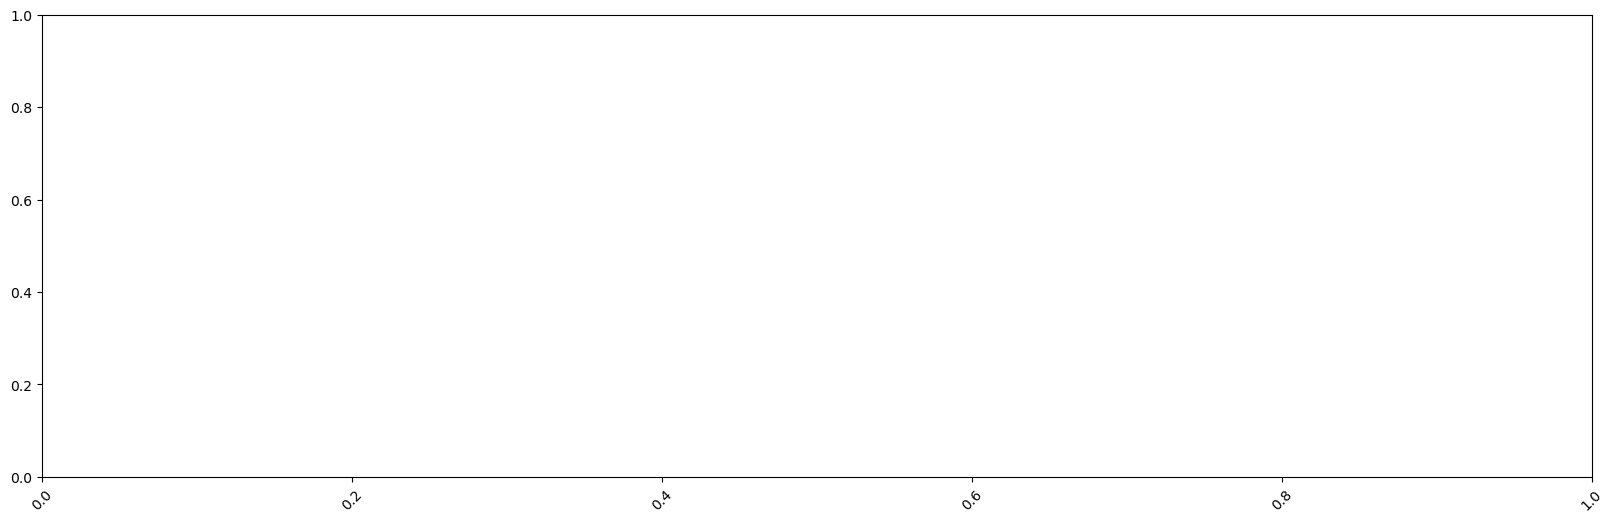

In [68]:
plt.figure(figsize=(20, 6))
plt.xticks(rotation=45)

top_10_neighbourhoods = pd.DataFrame(listings_nyc_final_neighbourhood.head(10))

sns.barplot(y=top_10_neighbourhoods['revenue_month'], x=top_10_neighbourhoods['neighbourhood'])

